# Curating a data set for elastic $(p,p)$ and $(n,n)$ scattering for multiple isotopes

 We will make use of the class `curate` submodule in `exfor_tools`. 

In [1]:
from exfor_tools import curate, quantities, reaction
from periodictable import elements

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


We will use the 2024 evaluation, avilable here: https://nds.iaea.org/nrdc/exfor-master/list.html

If you have an older version, instructions for updating the database for your `exfor_tools` install are available here: https://github.com/beykyle/exfor_tools?tab=readme-ov-file#updating-the-exfor-data-base

In [2]:
import numpy as np
from IPython.display import Latex, Math, display

In [3]:
print(quantities)

['dXS/dA', 'dXS/dRuth', 'Ay']


In [4]:
Ca48 = (48, 20)
Ca44 = (44, 20)
Ca42 = (42, 20)
Ca40 = (40, 20)

Ni64 = (64, 28)
Sr86 = (86, 38)
Sr88 = (88, 38)
Mo92 = (92, 42)
Mo94 = (94, 42)

Ba138 = (138, 56)
Ce140 = (140, 58)

Pb206 = (206, 82)
Pb208 = (208, 82)

Sm144 = (144, 62)
Sm148 = (148, 62)

Sn116 = (116, 50)
Sn118 = (118, 50)
Sn120 = (120, 50)
Sn122 = (122, 50)
Sn124 = (124, 50)

Zr90 = (90, 40)
Zr92 = (92, 40)
Zr94 = (94, 40)
Zr96 = (96, 40)

neutron = (1, 0)
proton = (1, 1)

In [5]:
projectiles = [neutron, proton]

In [6]:
beta2_by_target = dict(
    [
        (Ca48, 0.1074),
        (Ca44, 0.251),
        (Ca42, 0.2454),
        (Ca40, 0.11712),
        (Ni64, 0.1583),
        (Sr86, 0.1444),
        (Sr88, 0.1153),
        (Zr90, 0.091911),
        (Zr92, 0.1014),
        (Zr94, 0.08810),
        (Zr96, 0.0604),
        (Mo92, 0.1093),
        (Mo94, 0.1511),
        (Sn116, 0.111715),
        (Sn118, 0.110122),
        (Sn120, 0.107110),
        (Sn122, 0.102811),
        (Sn124, 0.0095216),
        (Ba138, 0.0938),
        (Sm144, 0.088),
        (Sm148, 0.142),
        (Pb206, 0.03235),
        (Pb208, 0.056314),
    ]
)

In [7]:
max_beta2 = 0.16
targets = list(
    [target for target, beta2 in beta2_by_target.items() if beta2 < max_beta2]
)
display(
    Math(
        ", ".join(
            [f"\,^{{{target[0]}}} \\rm{{{elements[target[1]]}}}" for target in targets]
        )
    )
)

<IPython.core.display.Math object>

In [8]:
energy_range = [10, 200]
min_num_points = 5

# if normalization uncertainty isn't reported assign it to be 5%
default_systematic_normalization_err = 0.05

settings = {
    "Einc_range": energy_range,
    "filter_kwargs": {"min_num_pts": min_num_points},
}

entries_to_ignore_pp_absolute = [
    "E0120",
    "C0078",  # redundant, huge uncertainties
    "E0795",  # duplicate, no uncertainties
    "O0032",  # duplicate to E0166 and E0249
    "E0249",  # duplicate to E0166 and O0032
    "O0253",  # duplicate to Ruth O0253
    "C3000",  # no uncertainties
    "E0904",  # no uncertainties
    "C1019",  # old and in poor agreement w/ other measurements due to normalization but no normalization unc given
    "O0553",  # ratio to ruth does not go to 1 at low angle
    "O0166",  # ratio to ruth does not go to 1 at low angle
]
entries_to_ignore_pp_Ruth = [
    "O0490",
    "E0120",  # no uncertainties
    "O0432",  # no uncertainties
    "C3001",  # no uncertainties
    "E1846",  # no uncertainties
    "C1397",  # no uncertainties
    "C1019",  # old and in poor agreement w/ other measurements due to normalization but no normalization unc given
    "O0553",  # ratio to ruth does not go to 1 at low angle
    "O0166",  # ratio to ruth does not go to 1 at low angle
    "O1199",  # angles in exfor are systematically off compared to figures in paper (lab v. cm angle?)
]

entries_to_ignore_nn = [
    "14317",  # duplicate
]

## EXFOR querying and parsing

## Parsing $(n,n)$ data

In [9]:
nn_data = dict(
    [
        (
            target,
            curate.MultiQuantityReactionData(
                reaction.ElasticReaction(target=target, projectile=neutron),
                quantities=["dXS/dA"],
                settings=settings,
                vocal=True,
            ),
        )
        for target in targets
    ]
)


Now parsing dXS/dA for 48-Ca(n,el)

Found subentry 14303004 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303005 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 1 entries
Failed to parse 0 entries:


Now parsing dXS/dA for 40-Ca(n,el)

Found subentry 12785002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 12996002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA', 'DATA-ERR']
Found subentry 13946003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'ERR-S', 'ERR-SYS']
Found subentry 14303002 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 4 entries
Failed to parse 0 entries:


Now parsing dXS/dA for 64-Ni(n,el)


Succesfully parsed 0 entries
Failed to parse 0 entrie

## Parsing $(p,p)$ data

In [10]:
pp_data = dict(
    [
        (
            target,
            curate.MultiQuantityReactionData(
                reaction.ElasticReaction(target=target, projectile=proton),
                quantities=["dXS/dA", "dXS/dRuth"],
                settings=settings,
                vocal=True,
            ),
        )
        for target in targets
    ]
)


Now parsing dXS/dA for 48-Ca(p,el)

Found subentry C0624005 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Failed to parse subentry C0624005:
	Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
Found subentry E0166016 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry E0249008 with the following columns:
['EN', 'POL-BM-MIN', 'POL-BM-MAX', 'E-RSL', 'ANG-ERR', 'ANG-CM', 'ANG-RSL', 'DATA-CM', 'DATA-ERR']
Found subentry O0032057 with the following columns:
['EN', 'ANG-CM', 'DATA', 'ERR-S']
Found subentry O0387002 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA']

Succesfully parsed 4 entries
Failed to parse 1 entries:


Now parsing dXS/dRuth for 48-Ca(p,el)

Found subentry O0239014 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM']
Found subentry O0239016 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-C

Wow, that's a lot of information! 

## Let's step through the targets one by one, handling any failed parses our outliers, and plotting the data


In [11]:
def check_measurements_for_errs(entry):
    for m in entry.measurements:
        if np.allclose(m.statistical_err, 0):
            print(f"subentry {m.subentry} is missing statisitcal errors!")


def flag_entries(target):

    for entry_id, entry in nn_data[target].data["dXS/dA"].entries.items():
        check_measurements_for_errs(entry)
        if entry_id in entries_to_ignore_nn:
            print(f"Look at entry {entry_id} for (n,n)")

    for entry_id, entry in nn_data[target].data["dXS/dA"].failed_parses.items():
        check_measurements_for_errs(entry)
        if entry_id in entries_to_ignore_nn:
            print(f"Look at failed parse {entry_id} for (n,n)")

    for entry_id, entry in pp_data[target].data["dXS/dA"].entries.items():
        check_measurements_for_errs(entry)

        if entry_id in entries_to_ignore_pp_absolute:
            print(f"Look at entry {entry_id} for (p,p) absolute")

    for entry_id, entry in pp_data[target].data["dXS/dA"].failed_parses.items():
        check_measurements_for_errs(entry)
        if entry_id in entries_to_ignore_pp_absolute:
            print(f"Look at failed parse {entry_id} for (p,p) absolute")

    for entry_id, entry in pp_data[target].data["dXS/dRuth"].entries.items():
        check_measurements_for_errs(entry)

        if entry_id in entries_to_ignore_pp_Ruth:
            print(f"Look at entry {entry_id} for (p,p) ratio")
    for entry_id, entry in pp_data[target].data["dXS/dRuth"].failed_parses.items():
        check_measurements_for_errs(entry)

        if entry_id in entries_to_ignore_pp_Ruth:
            print(f"Look at failed parse {entry_id} for (p,p) ratio")

## $^{48}$Ca

In [12]:
target = Ca48
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 2}
Number of (p,p) measurements: {'dXS/dA': 4, 'dXS/dRuth': 3}
Look at entry E0249 for (p,p) absolute
Look at entry O0032 for (p,p) absolute


In [13]:
print(pp_data[target].data["dXS/dA"].entries.keys())
del pp_data[target].data["dXS/dA"].entries["E0249"]
del pp_data[target].data["dXS/dA"].entries["O0032"]
print(pp_data[target].data["dXS/dA"].entries.keys())

dict_keys(['E0166', 'E0249', 'O0032', 'O0387'])
dict_keys(['E0166', 'O0387'])


#### failed parses

In [14]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [15]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [16]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: C0624
C0624005  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness



In [17]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624005 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


#### plotting

(-5.0, 220.0)

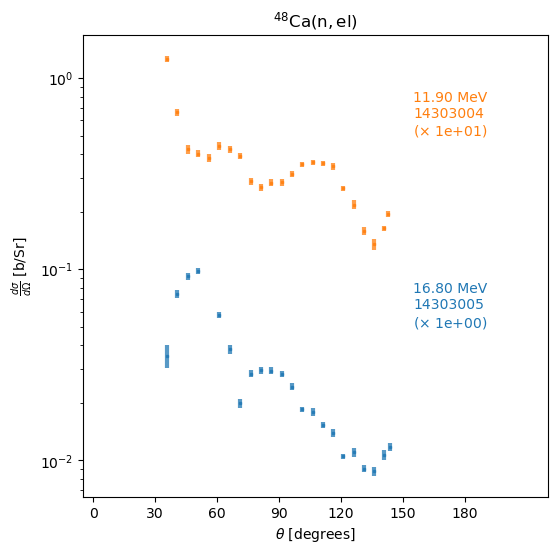

In [18]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.05},
        plot_kwargs={"offsets": 10},
        y_size=6,
    )
)
axes[0].set_xlim([-5, 220])

(-5.0, 220.0)

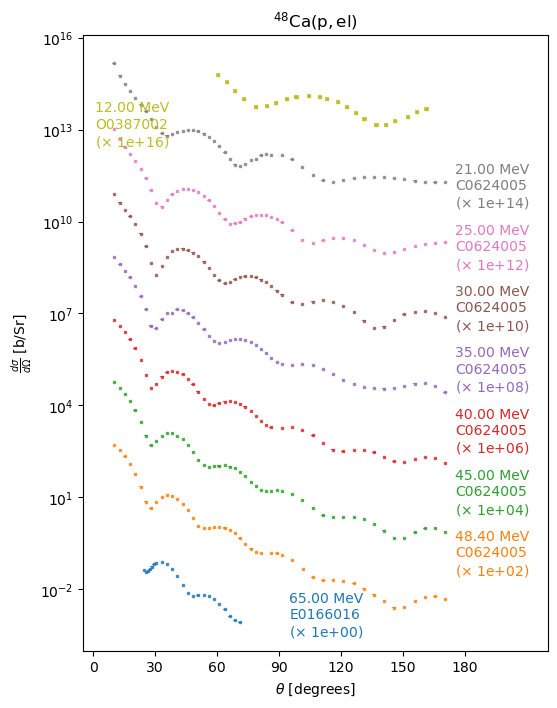

In [19]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.0003},
        plot_kwargs={"offsets": 100},
        y_size=8,
    )
)
axes[0].set_xlim([-5, 220])

(-20.0, 220.0)

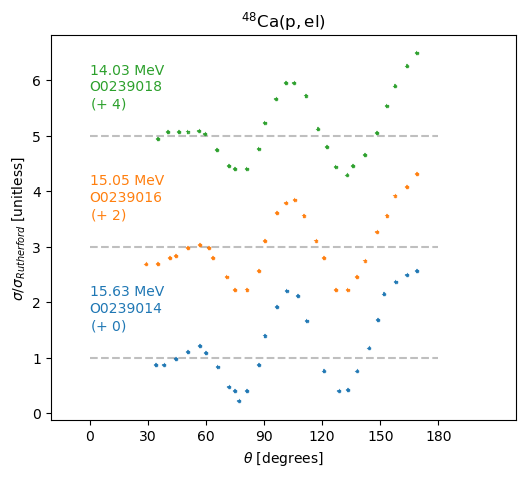

In [20]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1.5,
            "label_xloc_deg": 0,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 220])

## $^{40}$Ca

In [21]:
target = Ca40
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 14}
Number of (p,p) measurements: {'dXS/dA': 19, 'dXS/dRuth': 5}
Look at entry C0078 for (p,p) absolute
Look at entry E0249 for (p,p) absolute
subentry E0795002 is missing statisitcal errors!
Look at entry E0795 for (p,p) absolute
Look at entry O0032 for (p,p) absolute
Look at entry O0553 for (p,p) absolute
Look at failed parse O0253 for (p,p) absolute
subentry E0120016 is missing statisitcal errors!
Look at entry E0120 for (p,p) ratio
Look at entry O1199 for (p,p) ratio


In [22]:
# Exclusions:
del pp_data[target].data["dXS/dA"].entries["C0078"]  # redundant, huge uncertainties
del pp_data[target].data["dXS/dA"].entries["E0249"]  # duplicate to E0166 and O0032
del pp_data[target].data["dXS/dA"].entries["E0795"]  # duplicate, no uncertainties
del pp_data[target].data["dXS/dA"].entries["O0032"]  # duplicate to E0166 and E0249
del pp_data[target].data["dXS/dA"].entries["O0553"]

del pp_data[target].data["dXS/dA"].failed_parses["O0253"]
# duplicate to Rutherford from same entry, some data shows Compound Elastic effects per original paper
del pp_data[target].data["dXS/dRuth"].entries["E0120"]  # no uncertainties
del pp_data[target].data["dXS/dRuth"].entries["O1199"]

### handling failed parses

In [23]:
curate.print_failed_parses(nn_data[target].data["dXS/dA"].failed_parses)

In [24]:
curate.print_failed_parses(pp_data[target].data["dXS/dRuth"].failed_parses)

Entry: E1677
E1677016  :  negative errors under label -DATA-ERR!
ERR-ANALYS (DATA-ERR) No information on source of uncertainties.
ERR-ANALYS (ERR-S,,5.) Statistical error <5%
Entry: O0211
O0211004  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0253
O0253017  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
ERR-ANALYS (ERR-1) Relative uncertainties
           (ERR-2) Absolute uncertainty
           (ERR-3) the uncertainty in the corrections for carbon
           and oxygen at forward angles

Entry: O0302
O0302004  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG
ERR-ANALYS  The statistical error varied from 1 % at
            small angles to 4 % at 50 degrees.
           (DATA-ERR1) The overall error was calculated to
            be +/- 5% for the relative cross section

In [25]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "E1677",
    parsing_kwargs={
        "statistical_err_labels": ["+DATA-ERR", "-DATA-ERR"],
        "statistical_err_treatment": "difference",
    },
)

Found subentry E1677016 with the following columns:
['EN', 'ANG-CM', 'DATA', '+DATA-ERR', '-DATA-ERR']
Failed to parse subentry E1677016:
	negative errors under label -DATA-ERR!
Reattempt parse failed


In [26]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211004 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [27]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253017 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA']


In [28]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0302",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302004 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [29]:
curate.print_failed_parses(pp_data[target].data["dXS/dA"].failed_parses)

Entry: C0624
C0624002  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness

Entry: O0049
O0049

In [30]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [31]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049004 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [32]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142004 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [33]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0208",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208006 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [34]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0382",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T", "DATA-ERR"],
    },
)

Found subentry O0382002 with the following columns:
['EN', 'EN-RSL-FW', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [35]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101002 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


### plotting

(-20.0, 30.0)

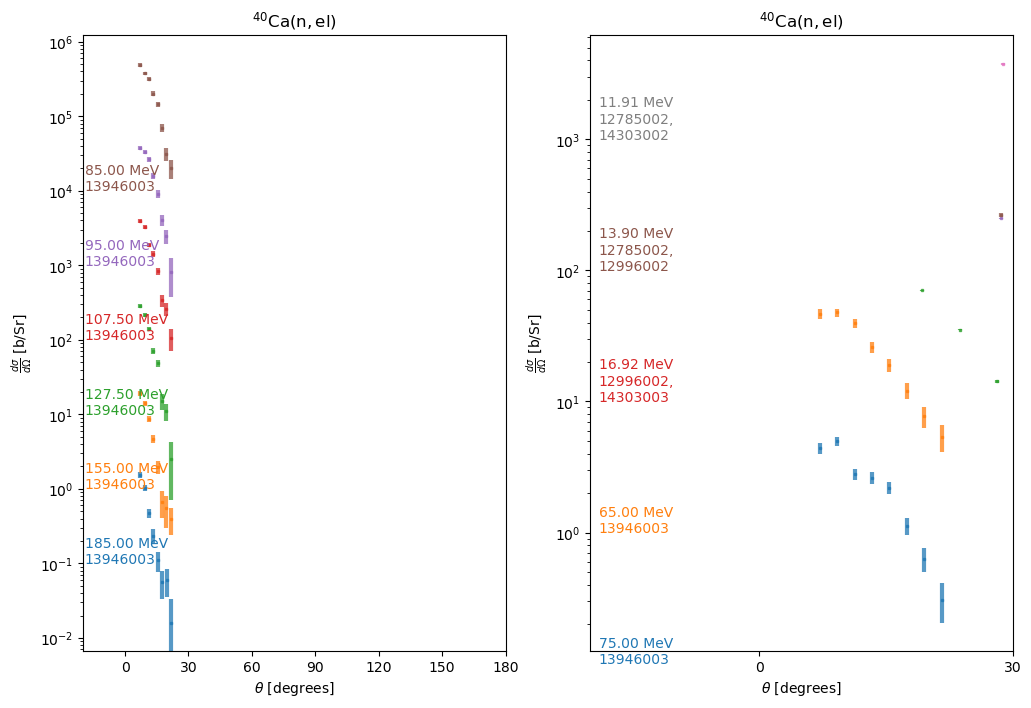

In [36]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-20, 180])
axes[1].set_xlim([-20, 30])

[(-5.0, 220.0), (-5.0, 220.0), (-5.0, 220.0)]

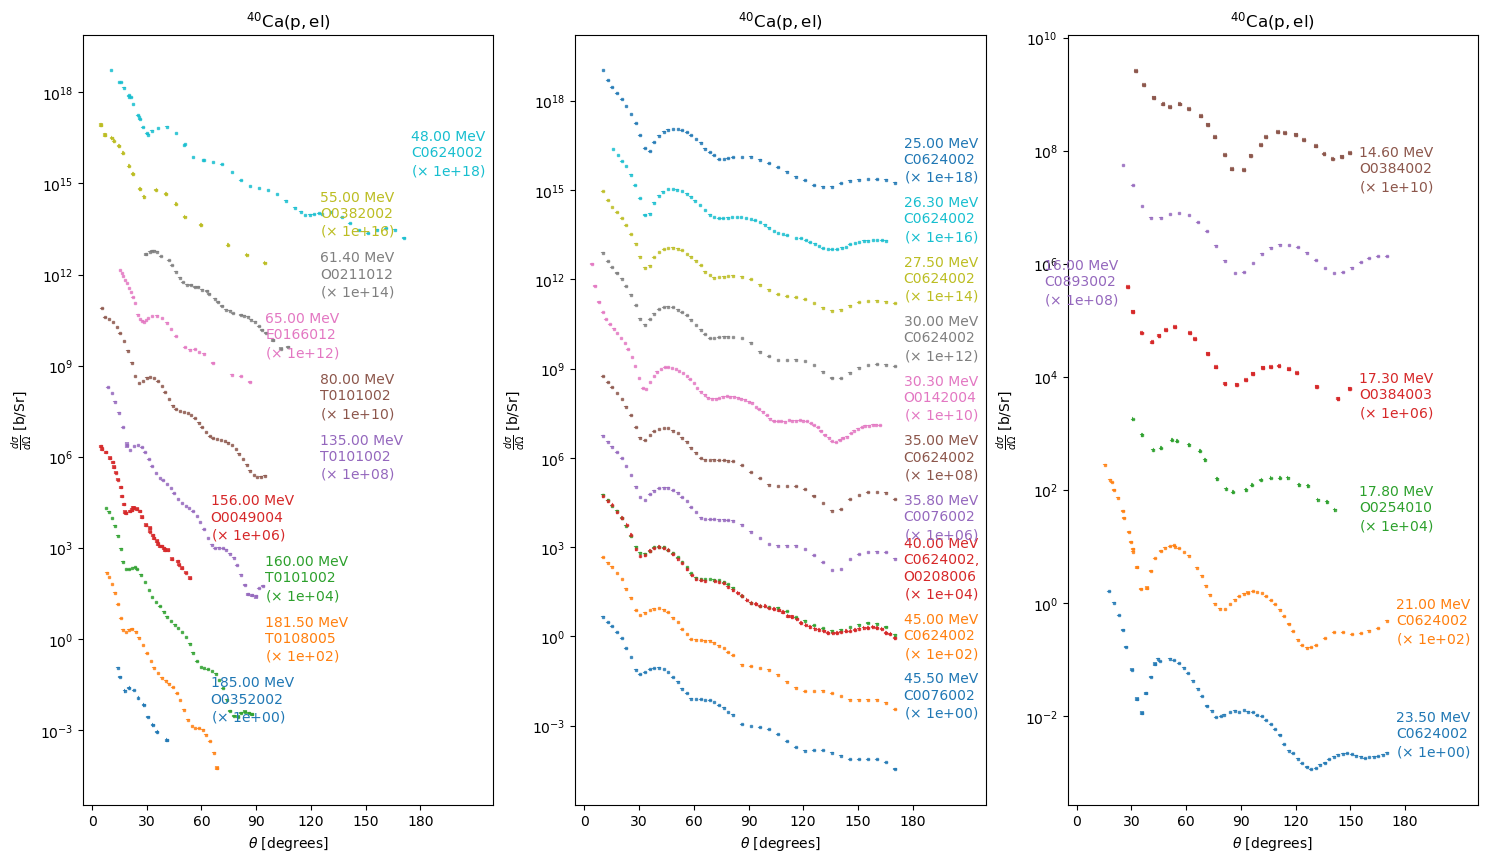

In [37]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

[(-5.0, 220.0), (-5.0, 220.0)]

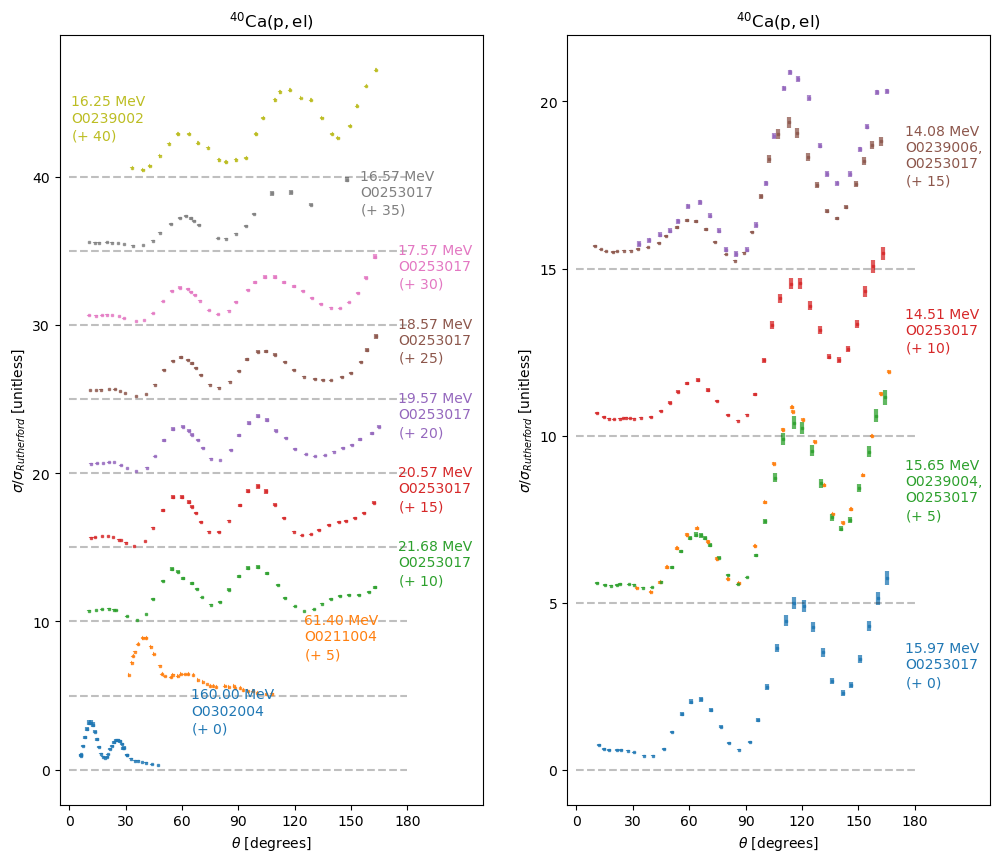

In [38]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=9,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 2.5,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 5, "log": False, "draw_baseline": True},
        y_size=10,
    )
)
[a.set_xlim([-5, 220]) for a in axes]

## $^{138}$Ba

In [39]:
target = Ba138
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 1, 'dXS/dRuth': 2}
subentry C3001002 is missing statisitcal errors!
Look at entry C3001 for (p,p) ratio


In [40]:
del pp_data[target].data["dXS/dRuth"].entries["C3001"]

#### failed parses

In [41]:
curate.print_failed_parses(nn_data[target].data["dXS/dA"].failed_parses)

In [42]:
curate.print_failed_parses(pp_data[target].data["dXS/dRuth"].failed_parses)

In [43]:
curate.print_failed_parses(pp_data[target].data["dXS/dA"].failed_parses)

#### plotting

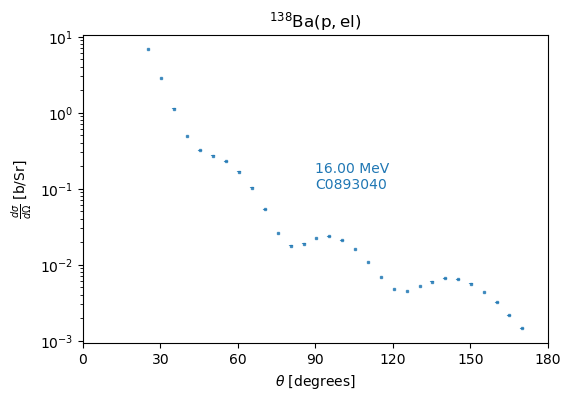

In [44]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_xloc_deg": 90,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=4,
    )
)

(0.0, 120.0)

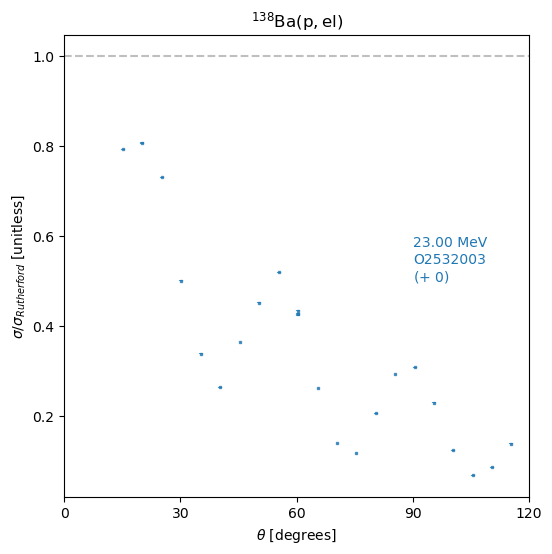

In [45]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=2,
        label_kwargs={
            "label_xloc_deg": 90,
            "label_offset_factor": 1 / 2,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=6,
    )
)
axes[0].set_xlim([0, 120])

## $^{206}$Pb

In [46]:
target = Pb206
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 1}
Number of (p,p) measurements: {'dXS/dA': 0, 'dXS/dRuth': 1}


#### failed parses

In [47]:
curate.print_failed_parses(nn_data[target].data["dXS/dA"].failed_parses)

Entry: 10633
10633020  :  Ambiguous statistical error labels:
DATA-ERR2, MONIT-ERR, DATA-ERR1
ERR-ANALYS (DATA-ERR1) Relative uncertainties
           (DATA-ERR2) Normalization error



In [48]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "10633",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry 10633020 with the following columns:
['EN', 'DATA-ERR2', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


In [49]:
curate.print_failed_parses(pp_data[target].data["dXS/dRuth"].failed_parses)

In [50]:
curate.print_failed_parses(pp_data[target].data["dXS/dA"].failed_parses)

#### plotting

(-21.0, 180.0)

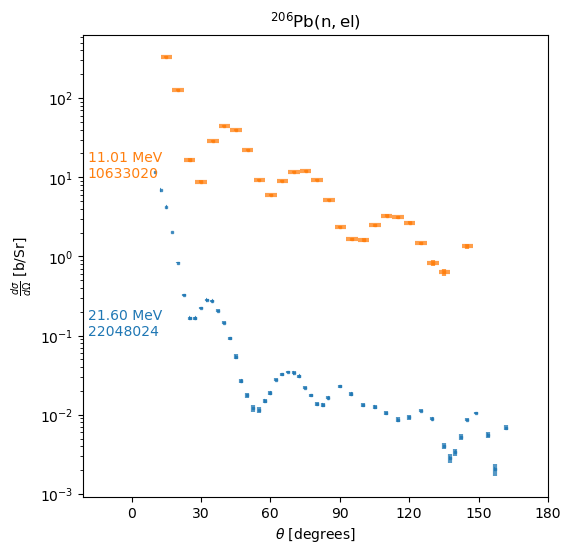

In [51]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=6,
    )
)
axes[0].set_xlim([-21, 180])

(0.0, 100.0)

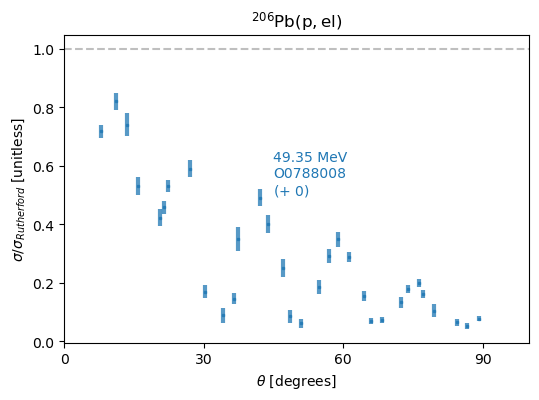

In [52]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=2,
        label_kwargs={
            "label_xloc_deg": 45,
            "label_offset_factor": 1 / 2,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([0, 100])

## $^{208}$Pb

In [53]:
target = Pb208
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 16}
Number of (p,p) measurements: {'dXS/dA': 10, 'dXS/dRuth': 4}
Look at failed parse 14317 for (n,n)
subentry E1846023 is missing statisitcal errors!
Look at entry O0032 for (p,p) absolute
Look at entry O0166 for (p,p) absolute
Look at entry C1019 for (p,p) ratio
Look at entry O0490 for (p,p) ratio


In [54]:
del nn_data[target].data["dXS/dA"].failed_parses["14317"]  # duplicate
del pp_data[target].data["dXS/dA"].entries["E1846"]
del pp_data[target].data["dXS/dA"].entries["O0032"]
del pp_data[target].data["dXS/dA"].entries["O0166"]
del pp_data[target].data["dXS/dRuth"].entries["C1019"]
del pp_data[target].data["dXS/dRuth"].entries["O0490"]

#### failed parses

In [55]:
curate.print_failed_parses(nn_data[target].data["dXS/dA"].failed_parses)

Entry: 12701
12701005  :  Ambiguous statistical error labels:
DATA-ERR2, DATA-ERR1
ERR-ANALYS (DATA-ERR1) Relative uncertainties due to:
           . statistics in yields (1-5% at15-90 degrees, 3-25%
             at 95-160 degrees).
           . monitor statistics (<1%),
           . finite geometry (1-8%),
           . compound nuclear contribution (<1%),
           . background attenuation due to sample (1-3.5%),
           . incident angle of proton beam (1%),
           . scattering target position (<1-2%),
           . mean scattering angle, 0.2-0.5 degrees.
           (DATA-ERR2) Normalization erorr due to:
           . statistics in yields (0-deg flux; <1%),
           . monitor statistics (0-deg flux; 1.7%),
           . dead time correction (<1%),
           . flux anisotrophy correction (<1%),
           . number of target nuclei (<1%).

Entry: 22847
22847003  :  Ambiguous statistical error labels:
ERR-2, ERR-3, ERR-T, ERR-S, ERR-1
ERR-ANALYS (ERR-T) Total=statistical+
      

In [56]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "12701",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry 12701005 with the following columns:
['DATA-ERR2', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


In [57]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "22847",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry 22847003 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-2', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T', 'ERR-S', 'ERR-1']


In [58]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "22987",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1", "ERR-3"],
    },
)

Found subentry 22987004 with the following columns:
['EN', 'EN-ERR', 'EN-RSL-FW', 'ERR-3', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T', 'ERR-S', 'ERR-1']


In [59]:
curate.print_failed_parses(pp_data[target].data["dXS/dRuth"].failed_parses)

Entry: O0211
O0211009  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0287
O0287002  :  Ambiguous statistical error labels:
ERR-1, DATA-ERR

ERR-ANALYS (ERR-1) The Absolute Uncertainty in the Cross Sections
            Was 8.3 %, Including the Errors in the Calibration
            Procedure and the Target Thickness Determination.
Entry: O0302
O0302002  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG
ERR-ANALYS  The statistical error varied from 1 % at
            small angles to 4 % at 50 degrees.
           (DATA-ERR1) The overall error was calculated to
            be +/- 5% for the relative cross sections and
           (DATA-ERR2)  +/-7 % for the absolute cross sections.
           (19970526A) ERR-ANALYS and COMMENT are included.
           (20040630U) Last checking has been done.
  

In [60]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211009 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [61]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0287",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0287002 with the following columns:
['EN', 'ERR-1', 'DATA-ERR', 'EN-RSL-FW', 'ANG-CM', 'DATA']


In [62]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0302",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302002 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [63]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0552",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0552008 with the following columns:
['EN', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [64]:
curate.print_failed_parses(pp_data[target].data["dXS/dA"].failed_parses)

Entry: O0049
O0049012  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
ERR-ANALYS (ERR-S,1.,6.) The statistical errors for the cross
           sections were 1 to 2% for ang. < 25. degr. and 3 to 6%
           for ang. > 25.degr.
           (ERR-T) The overall uncertainty

Entry: O0142
O0142011  :  Ambiguous statistical error labels:
ERR-1, ERR-T
ERR-ANALYS ERRORS QUOTED AGAINST INDIVIDUAL MEASUREMENTS ARE
           RELATIVE ERRORS WITHIN EACH ANGULAR DISTRIBUTION AND
           WERE COMPOUNDED FROM THEC FOLLOWING CONTRIBUTIONS-
           STATISTICAL ERROR ON THE NUMBER OF COUNTS IN THE
           ELASTIC PEAK,ERROR IN COUNTING LOSS CORRECTIONS,ERROR
           IN CORRECTION FOR SCATTERING BY IMPURITIES,DUE MAINLY
           TO UNCERTAINTY IN THE AMOUNT OF CONTAMINATION,RESIDUAL
           UNCERTAINTY IN SCATTERING ANGLE AFTER CORRECTIONS HAD
           BEEN MADE.THIS WAS TRANSFORMED TO AN ERROR IN CROSS
           SECTION AT THE NOMINAL SCATTERING ANGLE.
           

In [65]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049012 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [66]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142011 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [67]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0208",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208009 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [68]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0285",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0285002 with the following columns:
['EN', 'EN-RSL-FW', 'DATA-ERR', 'MONIT', 'MONIT-ERR', 'ANG-CM', 'DATA-CM']


In [69]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101004 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


#### plotting

(0.0, 90.0)

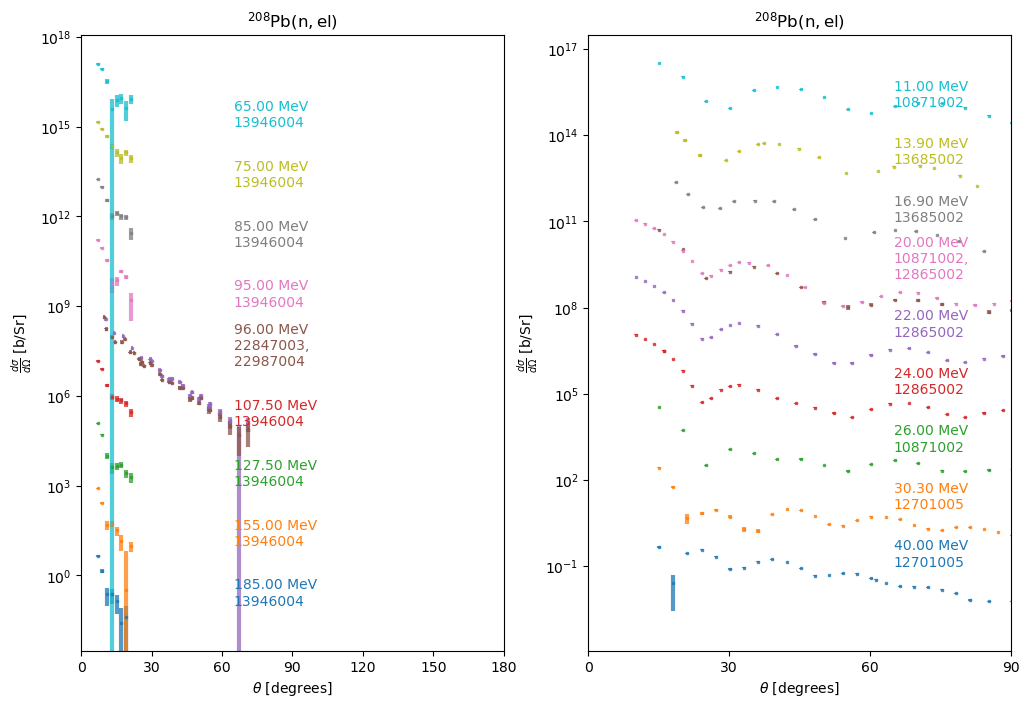

In [70]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=9,
        label_kwargs={
            "label_xloc_deg": 65,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=8,
    )
)
axes[1].set_xlim([0, 90])

Looks like there may be mis-transcribed data points in `12701`:

In [71]:
print([m.Einc for m in nn_data[target].data["dXS/dA"].entries["12701"].measurements])

print(nn_data[target].data["dXS/dA"].entries["12701"].measurements[1].y[:5])
nn_data[target].data["dXS/dA"].entries["12701"].measurements[1].y[1] *= 10
nn_data[target].data["dXS/dA"].entries["12701"].measurements[1].notes = [
    "2nd point increased by a factor of 10"
]

[30.3, 40.0]
[0.4686  0.02562 0.2837  0.3767  0.2158 ]


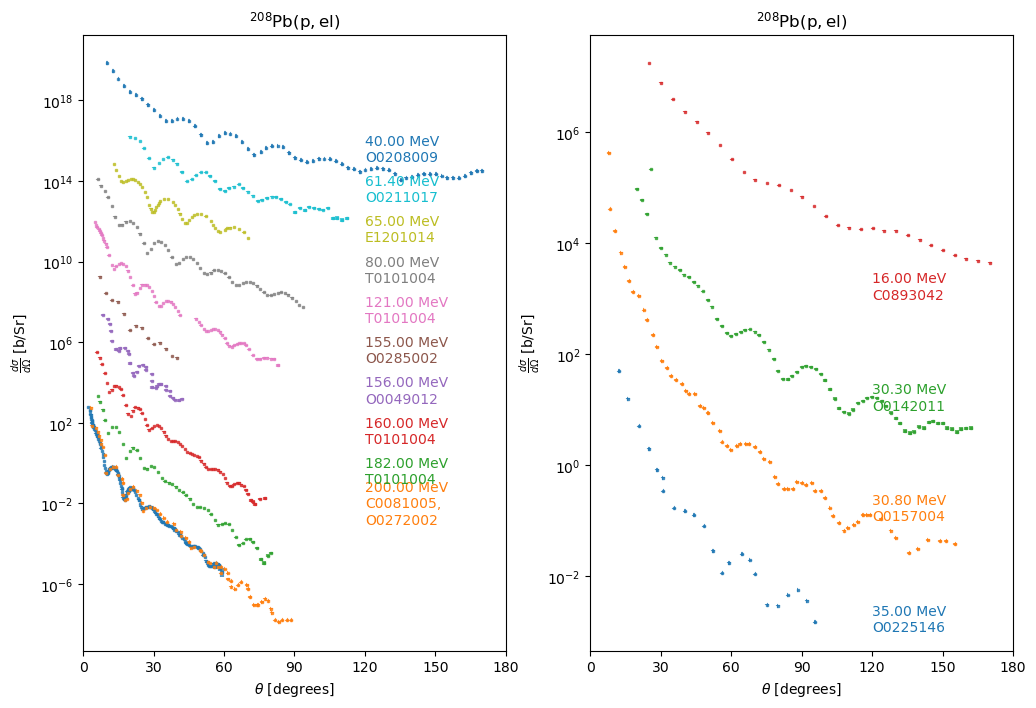

In [72]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": 120,
            "label_offset_factor": 0.001,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=8,
    )
)

fix apparent mistranscriptions

In [73]:
print(pp_data[target].data["dXS/dA"].entries["O0142"].measurements[0].y[:10])
pp_data[target].data["dXS/dA"].entries["O0142"].measurements[0].y[3] *= 0.1
pp_data[target].data["dXS/dA"].entries["O0142"].measurements[0].statistical_err[
    3
] *= 0.1
pp_data[target].data["dXS/dA"].entries["O0142"].measurements[0].general_systematic_err[
    3
] *= 0.1

pp_data[target].data["dXS/dA"].entries["O0142"].measurements[0].notes = [
    "12th to last pt decreased by factor of 10"
]

[ 9.539   6.037   3.374  21.561   1.264   0.8222  0.6223  0.4491  0.3806
  0.3291]


In [74]:
print(pp_data[target].data["dXS/dA"].entries["O0157"].measurements[0].y[:10])
pp_data[target].data["dXS/dA"].entries["O0157"].measurements[0].y[0] *= 0.1
pp_data[target].data["dXS/dA"].entries["O0157"].measurements[0].statistical_err[
    0
] *= 0.1
pp_data[target].data["dXS/dA"].entries["O0157"].measurements[0].general_systematic_err[
    0
] *= 0.1

pp_data[target].data["dXS/dA"].entries["O0157"].measurements[0].notes = [
    "1st pt decreased by factor of 10"
]

[4.22e+03 4.08e+02 1.67e+02 6.83e+01 3.76e+01 2.07e+01 1.32e+01 1.12e+01
 6.15e+00 4.16e+00]


In [75]:
print(pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].y[:10])
pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].x = (
    pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].x[1:]
)
pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].x_err = (
    pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].x_err[1:]
)
pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].statistical_err = (
    pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].statistical_err[1:]
)
pp_data[target].data["dXS/dA"].entries["C0081"].measurements[
    0
].general_systematic_err = (
    pp_data[target]
    .data["dXS/dA"]
    .entries["C0081"]
    .measurements[0]
    .general_systematic_err[1:]
)

pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].y = (
    pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].y[1:]
)
pp_data[target].data["dXS/dA"].entries["C0081"].measurements[0].rows -= 1

[630.16 433.67 395.3  275.54 257.32 194.31 175.   143.31 128.69 104.85]


(0.0, 90.0)

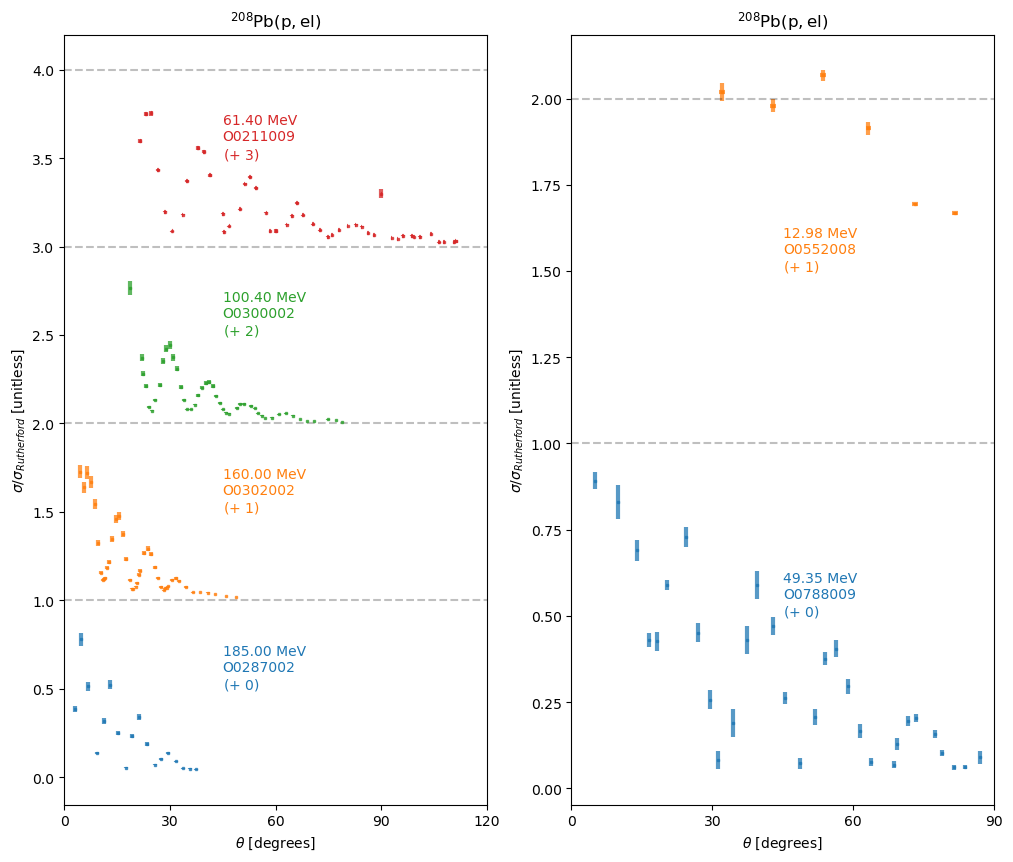

In [76]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=4,
        label_kwargs={
            "label_xloc_deg": 45,
            "label_offset_factor": 1 / 2,
            "label_offset": True,
            "label_exfor": True,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=10,
    )
)
axes[0].set_xlim([0, 120])
axes[-1].set_xlim([0, 90])

In [77]:
print(pp_data[target].data["dXS/dRuth"].entries["O0211"].measurements[0].y[-20:])
pp_data[target].data["dXS/dRuth"].entries["O0211"].measurements[0].y[-12] *= 0.1
pp_data[target].data["dXS/dRuth"].entries["O0211"].measurements[0].statistical_err[
    -12
] *= 0.1
pp_data[target].data["dXS/dRuth"].entries["O0211"].measurements[
    0
].general_systematic_err[-12] *= 0.1
pp_data[target].data["dXS/dRuth"].entries["O0211"].measurements[0].notes = [
    "12th to last pt decreased by factor of 10"
]

[0.057  0.0658 0.0926 0.1167 0.124  0.112  0.0757 0.0658 0.3    0.0493
 0.0442 0.0622 0.0627 0.0561 0.0564 0.0712 0.0233 0.0262 0.0236 0.03  ]


## $^{144}$Sm

In [78]:
target = Sm144
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 3, 'dXS/dRuth': 0}
subentry C3000002 is missing statisitcal errors!
Look at entry C3000 for (p,p) absolute
subentry E0904044 is missing statisitcal errors!
Look at entry E0904 for (p,p) absolute
Look at entry O0032 for (p,p) absolute


In [79]:
# we handle O0032 and E0904 below
del pp_data[target].data["dXS/dA"].entries["C3000"]

#### failed parses

In [80]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [81]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [82]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: E0773
E0773006  :  Error while parsing E0773006: Expected only one DATA column, found 2




`E0773` includes polarization data in the same subentry in an unclear way, we will skip it.

#### plotting

(-5.0, 220.0)

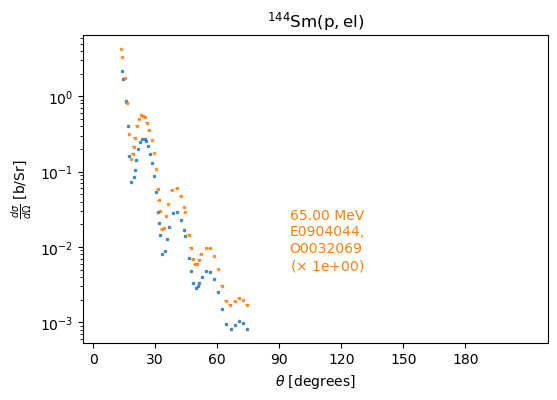

In [83]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=2,
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.005},
        plot_kwargs={"offsets": 100},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 220])

In [84]:
pp_data[target].data["dXS/dA"].entries["E0904"].measurements[0].statistical_err = (
    pp_data[target].data["dXS/dA"].entries["O0032"].measurements[0].statistical_err
)
pp_data[target].data["dXS/dA"].entries["E0904"].measurements[0].statistical_err = (
    pp_data[target].data["dXS/dA"].entries["O0032"].measurements[0].statistical_err
)

del pp_data[target].data["dXS/dA"].entries["O0032"]
pp_data[target].data["dXS/dA"].entries["E0904"].measurements[0].notes = [
    "clearly the two 65 MeV data sets (published in PRC same author in ssubsequent years) is exactly the same with different normalizations. "
    "We will take the normalization from the later one, E0904. However, E0904 does not have errors, so we will take those from O0032."
]

## $^{148}$Sm

In [85]:
target = Sm148
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 2, 'dXS/dRuth': 0}
subentry C1397002 is missing statisitcal errors!
subentry E0904046 is missing statisitcal errors!
Look at entry E0904 for (p,p) absolute


In [86]:
del pp_data[target].data["dXS/dA"].entries["E0904"]
del pp_data[target].data["dXS/dA"].entries["C1397"]

#### failed parses

In [87]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [88]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [89]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: D0289
D0289002  :  Ambiguous statistical error labels:
ERR-DIG, DATA-ERR1, ERR-1, ERR-2, ERR-S

ERR-ANALYS (ERR-1) Error in the determination of target thickness
           (ERR-2) Error due to determination of solid angle and
           calibration of the current integrator.
           (ERR-S) Statistical error
Entry: F1173
F1173002  :  Ambiguous statistical error labels:
ERR-DIG, DATA-ERR2
ERR-ANALYS (DATA-ERR1,0.,6.) Cross section measurement error
           (ANG-ERR-D)  Angle digitizing error
           (ERR-DIG)    Data digitizing error
           (DATA-ERR2)  Error from the graphic bars



In [90]:
pp_data[target].data["dXS/dA"].failed_parses

{'D0289': <exfor_tools.exfor_entry.ExforEntry at 0x798a737aa950>,
 'F1173': <exfor_tools.exfor_entry.ExforEntry at 0x798a7357ead0>}

In [91]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "D0289",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-S", "ERR-1", "ERR-2", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry D0289002 with the following columns:
['EN', 'EN-RSL', 'ERR-DIG', 'DATA-ERR1', 'ERR-1', 'ERR-2', 'ANG-CM', 'DATA-CM', 'ERR-S']


In [92]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "F1173",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR2", "ERR-DIG"],
    },
)

Found subentry F1173002 with the following columns:
['EN', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM', 'DATA-ERR2']


#### plotting

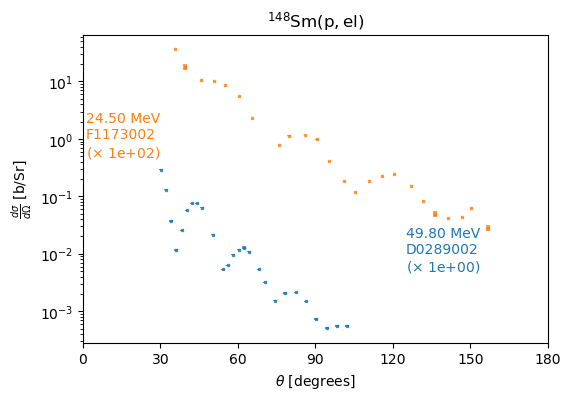

In [93]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={"label_exfor": True, "label_offset_factor": 0.005},
        plot_kwargs={"offsets": 100},
        y_size=4,
    )
)

## $^{116}$Sn

In [94]:
target = Sn116
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 3}
Number of (p,p) measurements: {'dXS/dA': 2, 'dXS/dRuth': 3}
Look at entry C1019 for (p,p) ratio


In [95]:
del pp_data[target].data["dXS/dRuth"].entries["C1019"]

#### failed parses

In [96]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [97]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

Entry: O0211
O0211008  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0434
O0434010  :  Error while parsing O0434010: Expected only one ERR-S column, found 2

ERR-ANALYS (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
           (ERR-S).The Overall Uncertainty in the Absolute Cross
           Sections was Estimated to be Less Than 5%.


In [98]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211008 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [99]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 210.0)

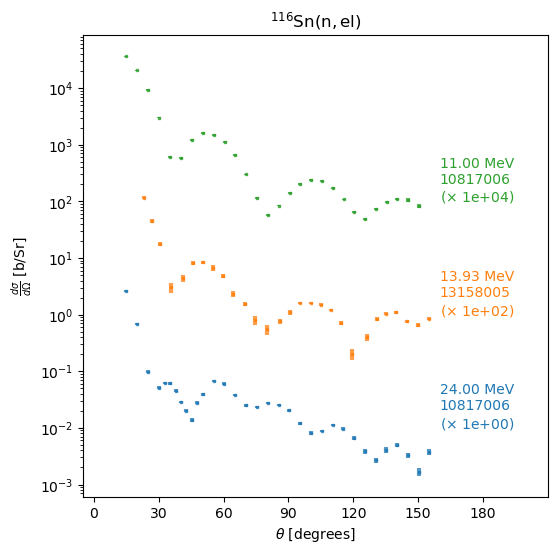

In [100]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=6,
    )
)
axes[0].set_xlim([-5, 210])

(-5.0, 200.0)

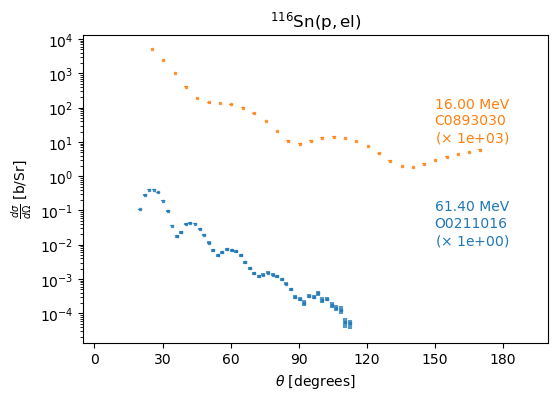

In [101]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 150,
        },
        plot_kwargs={"offsets": 1000},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 200])

(-20.0, 200.0)

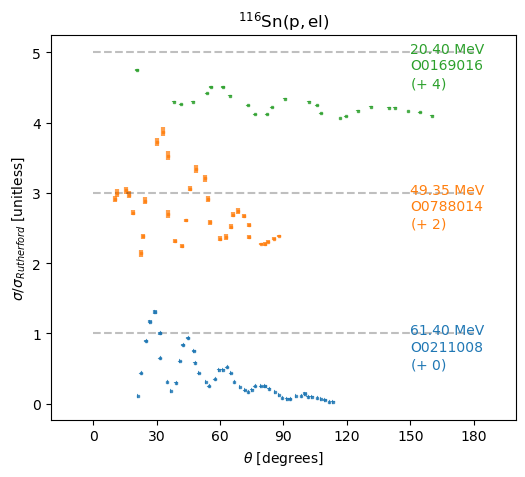

In [102]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 200])

## $^{118}$Sn

In [103]:
target = Sn118
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 4}
Number of (p,p) measurements: {'dXS/dA': 0, 'dXS/dRuth': 1}


#### failed parses

In [104]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [105]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [106]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 210.0)

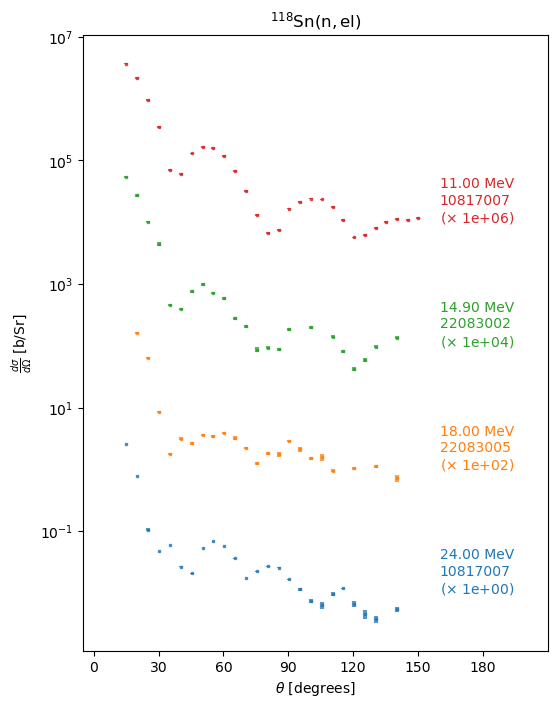

In [107]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=8,
    )
)
axes[0].set_xlim([-5, 210])

(-20.0, 200.0)

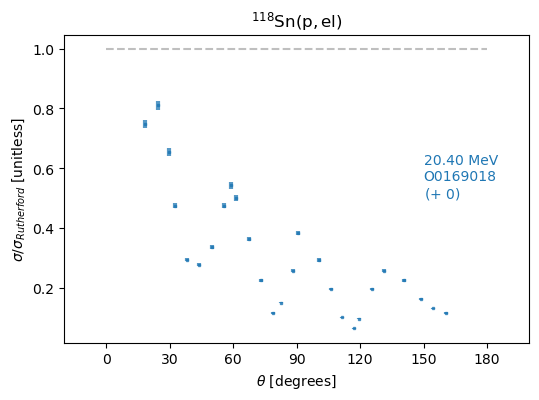

In [108]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{120}$Sn

In [109]:
target = Sn120
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 3}
Number of (p,p) measurements: {'dXS/dA': 8, 'dXS/dRuth': 4}


#### failed parses

In [110]:
nn_data[target].data["dXS/dA"].print_failed_parses()

Entry: 10633
10633017  :  Ambiguous statistical error labels:
DATA-ERR2, MONIT-ERR, DATA-ERR1
ERR-ANALYS (DATA-ERR1) Relative uncertainties
           (DATA-ERR2) Normalization error



In [111]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "10633",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry 10633017 with the following columns:
['EN', 'DATA-ERR2', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


In [112]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

Entry: O0302
O0302006  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG
ERR-ANALYS  The statistical error varied from 1 % at
            small angles to 4 % at 50 degrees.
           (DATA-ERR1) The overall error was calculated to
            be +/- 5% for the relative cross sections and
           (DATA-ERR2)  +/-7 % for the absolute cross sections.
           (20201204A) SD: Data were re-digitized. ERR-ANALYS
           deleted. STATUS updated.
Entry: O0328
O0328007  :  Ambiguous statistical error labels:
ERR-2, ERR-3, ERR-DIG, ERR-1
ERR-ANALYS (ERR-1) Statistical errors and the uncertainty
            in background subtraction.
           (ERR-2) Uncertainty in the current integration
           (ERR-3) Uncertainty in determining the target thickness



In [113]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0302",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302006 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [114]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0328",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2", "ERR-3"],
    },
)

Found subentry O0328007 with the following columns:
['EN', 'EN-ERR', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA', 'ERR-1']


In [115]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: O0049
O0049010  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
ERR-ANALYS (ERR-S,1.,6.) The statistical errors for the cross
           sections were 1 to 2% for ang. < 25. degr. and 3 to 6%
           for ang. > 25.degr.
           (ERR-T) The overall uncertainty

Entry: O0124
O0124004  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2
ERR-ANALYS (ANG-ERR).DATA-POINT READER UNCERTAINTY.
           (EN-ERR).THE UNCERTAINTY IS REPORTED BY AUTHORS.
ERR-ANALYS (DATA-ERR1).DATA-POINT READER UNCERTAINTY FROM FIG.1
           (DATA-ERR2).DATA-POINT READER UNCERTAINTY FROM FIG.2.
Entry: O0142
O0142010  :  Ambiguous statistical error labels:
ERR-1, ERR-T
ERR-ANALYS ERRORS QUOTED AGAINST INDIVIDUAL MEASUREMENTS ARE
           RELATIVE ERRORS WITHIN EACH ANGULAR DISTRIBUTION AND
           WERE COMPOUNDED FROM THEC FOLLOWING CONTRIBUTIONS-
           STATISTICAL ERROR ON THE NUMBER OF COUNTS IN THE
           ELASTIC PEAK,ERROR IN COUNTING LOSS CORRECTIONS,ERRO

In [116]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049010 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [117]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0124",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": [],
    },
)

Found subentry O0124004 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'DATA-ERR1', 'DATA-ERR2', 'ANG-CM', 'DATA', 'FLAG']


In [118]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142010 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


#### plotting

(-5.0, 210.0)

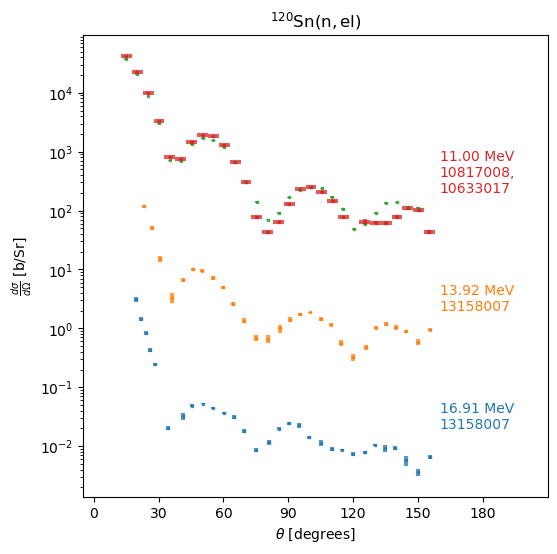

In [119]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_xloc_deg": 160,
            "label_offset_factor": 0.02,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 100},
        y_size=6,
    )
)
axes[0].set_xlim([-5, 210])

(0.0, 90.0)

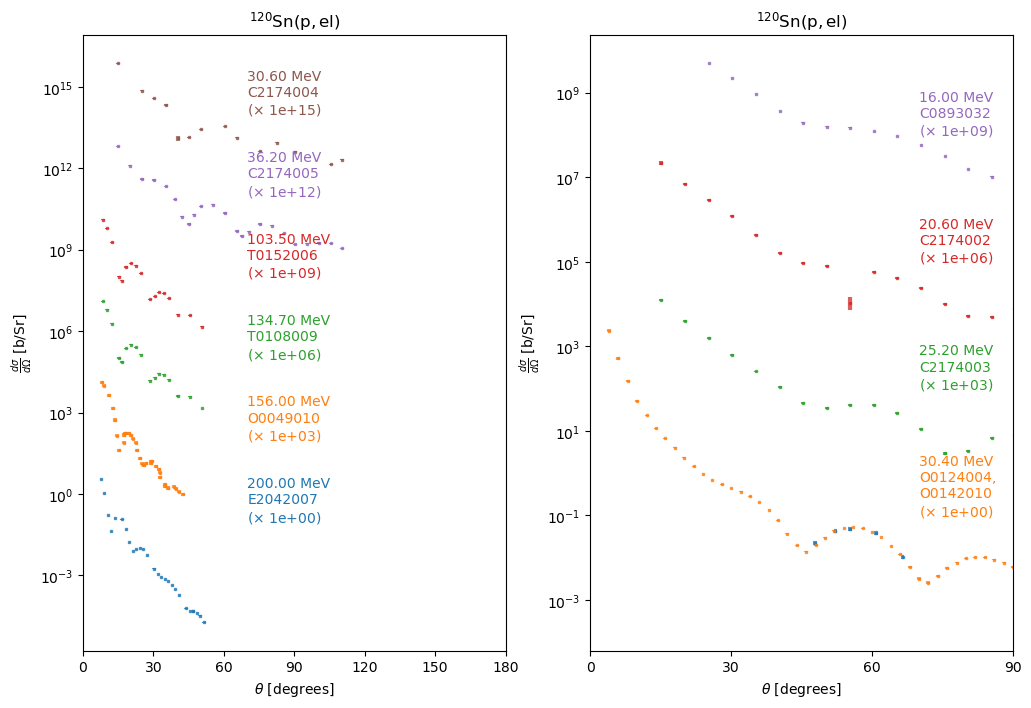

In [120]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.1,
            "label_xloc_deg": 70.0,
        },
        plot_kwargs={"offsets": 1000},
        y_size=8,
    )
)
axes[0].set_xlim([0, 180])
axes[1].set_xlim([0, 90])

In [121]:
print(pp_data[target].data["dXS/dA"].entries["C2174"].measurements[0].y[:12])
pp_data[target].data["dXS/dA"].entries["C2174"].measurements[0].y[8] *= 10
pp_data[target].data["dXS/dA"].entries["C2174"].measurements[0].notes = [
    "8th pt increased by factor of 10"
]

[2.2086e+01 6.8410e+00 2.9160e+00 1.1890e+00 4.3300e-01 1.6170e-01
 9.4200e-02 7.9400e-02 1.0800e-02 5.8500e-02 4.0900e-02 2.3800e-02]


(-20.0, 200.0)

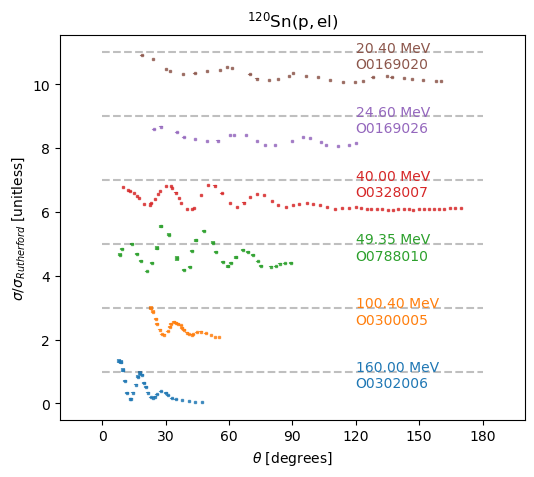

In [122]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_xloc_deg": 120,
            "label_offset_factor": 1 / 2,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 200])

## $^{122}$Sn

In [123]:
target = Sn122
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 1}
Number of (p,p) measurements: {'dXS/dA': 0, 'dXS/dRuth': 2}


#### failed parses

In [124]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [125]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [126]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

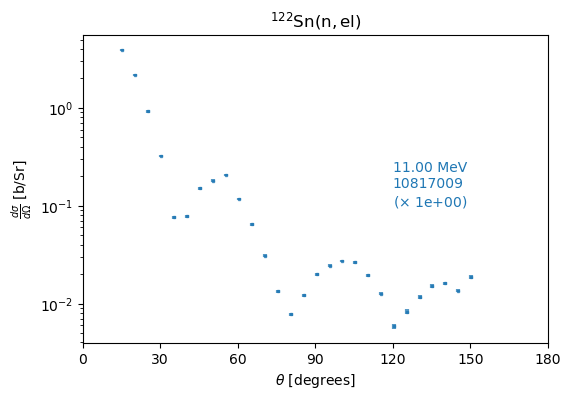

In [127]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.1,
            "label_xloc_deg": 120,
        },
        plot_kwargs={"offsets": 100},
        y_size=4,
    )
)

(-20.0, 200.0)

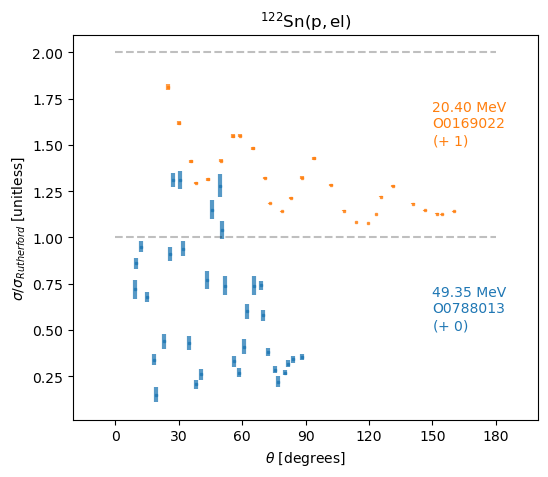

In [128]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 200])

## $^{124}$Sn

In [129]:
target = Sn124
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 2}
Number of (p,p) measurements: {'dXS/dA': 1, 'dXS/dRuth': 2}


#### failed parses

In [130]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [131]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [132]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 210.0)

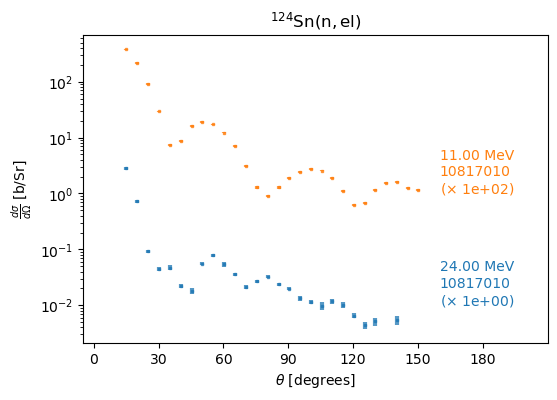

In [133]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 210])

(-5.0, 200.0)

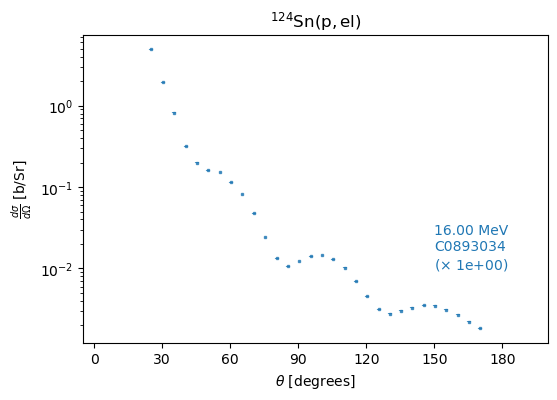

In [134]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 150,
        },
        plot_kwargs={"offsets": 1000},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 200])

(-20.0, 200.0)

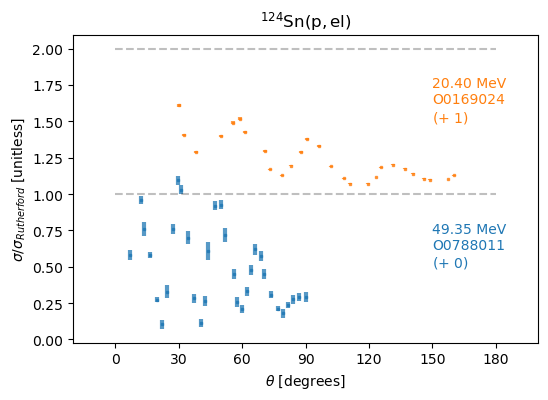

In [135]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{90}$Zr

In [136]:
target = Zr90
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 3}
Number of (p,p) measurements: {'dXS/dA': 8, 'dXS/dRuth': 4}


In [137]:
del pp_data[Zr90].data["dXS/dA"].entries["O0032"]  # duplicate to E0166

#### failed parses

In [138]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [139]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

Entry: O0211
O0211007  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0389
O0389002  :  Ambiguous statistical error labels:
ERR-1
ERR-ANALYS (ERR-1) Normalization uncertainty includes:
            * uncertainty of measured target thickness,
            * uncertainty of the detector solid-angle measurement,
            * uncertainty of the beam integration measurements
           (ERR-2) Errors affecting primarily the shapes of the
           angular distributions:
            * For elastic scattering the errors due to counting
           statistics were very small, and the estimate of error
           was obtained from the reproducibility of the data
           points.
            * For inelastic scattering the major contributions to
           error include counting statistics and the estimation of
        

In [140]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O0211",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR", "ERR-T"],
    },
)

Found subentry O0211007 with the following columns:
['EN', 'EN-RSL', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA', 'ERR-T']


In [141]:
pp_data[target].data["dXS/dRuth"].reattempt_parse(
    "O1825",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O1825003 with the following columns:
['EN', 'ANG-ERR-D', 'ERR-1', 'ERR-DIG', 'ANG-CM', 'DATA']


In [142]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: O0049
O0049009  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
ERR-ANALYS (ERR-S,1.,6.) The statistical errors for the cross
           sections were 1 to 2% for ang. < 25. degr. and 3 to 6%
           for ang. > 25.degr.
           (ERR-T) The overall uncertainty

Entry: O0208
O0208008  :  Ambiguous statistical error labels:
ERR-1, ERR-2
ERR-ANALYS (ERR-1) Uncertainty in the target thickness.
ERR-ANALYS (ERR-2) Relative error include all sources of error
           except uncertainty in the target thickness.
Entry: O0389
O0389002  :  Ambiguous statistical error labels:
ERR-1, ERR-2
ERR-ANALYS (ERR-1) Normalization uncertainty includes:
            * uncertainty of measured target thickness,
            * uncertainty of the detector solid-angle measurement,
            * uncertainty of the beam integration measurements
           (ERR-2) Errors affecting primarily the shapes of the
           angular distributions:
            * For elastic scattering the error

In [143]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0049",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049009 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [144]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0208",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208008 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [145]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0389",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0389002 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [146]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101003 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


#### plotting

(-5.0, 210.0)

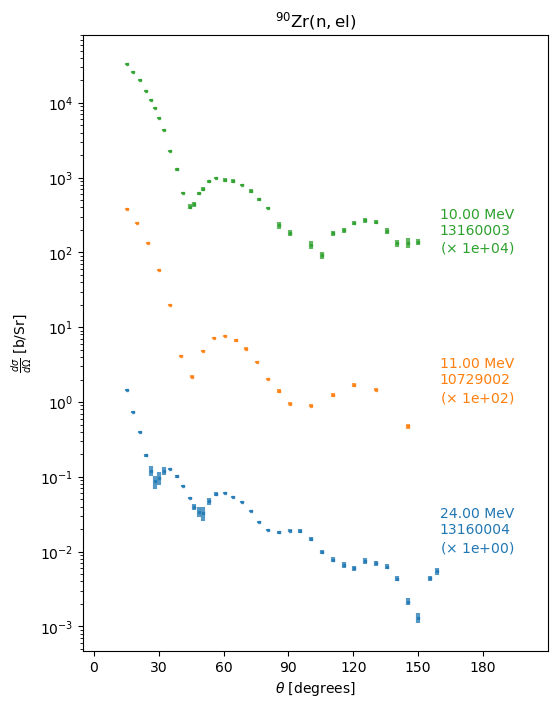

In [147]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=8,
    )
)
axes[0].set_xlim([-5, 210])

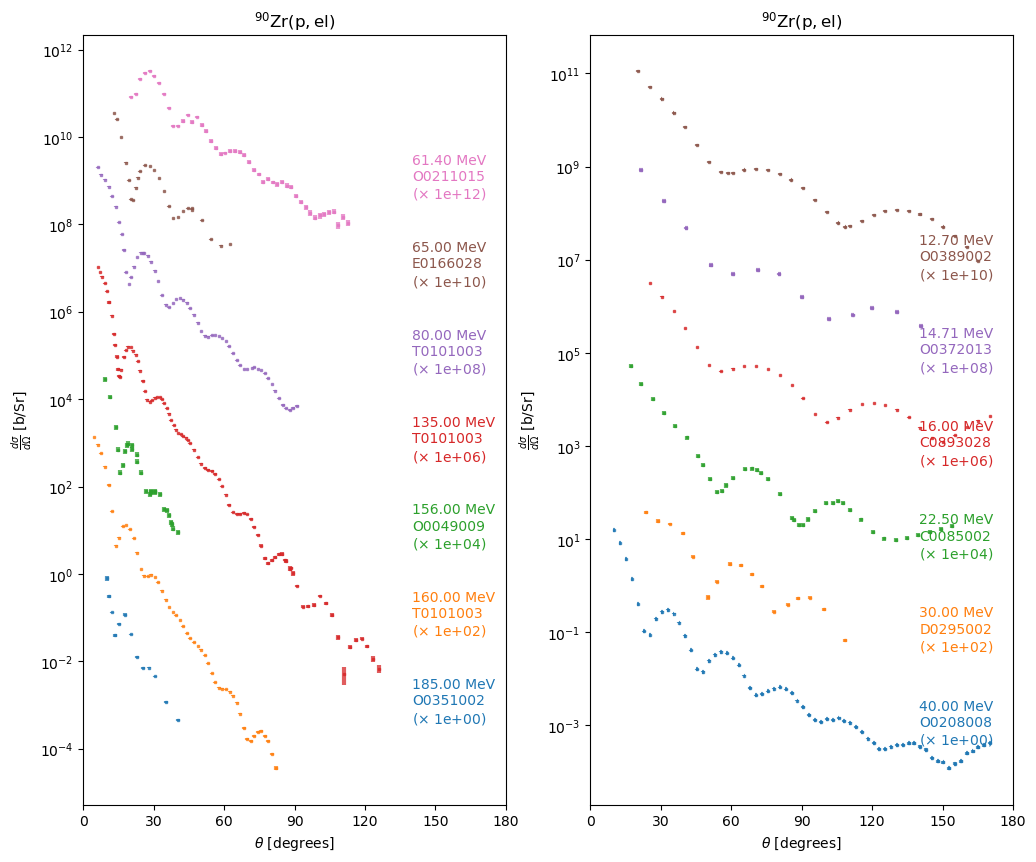

In [148]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=7,
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.0004,
            "label_xloc_deg": 140,
        },
        plot_kwargs={"offsets": 100},
    )
)

(-20.0, 200.0)

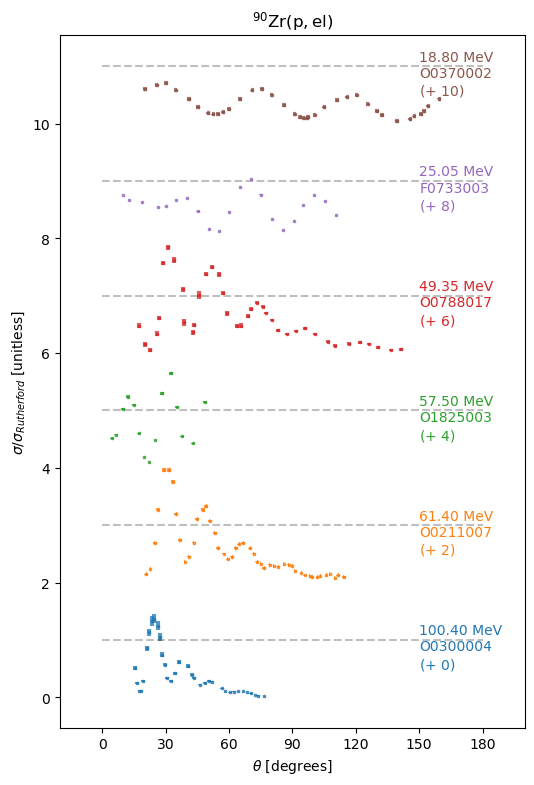

In [149]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=9,
    )
)
axes[0].set_xlim([-20, 200])

## $^{92}$Zr

In [150]:
target = Zr92
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 2}
Number of (p,p) measurements: {'dXS/dA': 5, 'dXS/dRuth': 2}


#### failed parses

In [151]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [152]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

Entry: O0389
O0389022  :  Ambiguous statistical error labels:
ERR-1
ERR-ANALYS (ERR-1) Normalization uncertainty includes:
            * uncertainty of measured target thickness,
            * uncertainty of the detector solid-angle measurement,
            * uncertainty of the beam integration measurements
           (ERR-2) Errors affecting primarily the shapes of the
           angular distributions:
            * For elastic scattering the errors due to counting
           statistics were very small, and the estimate of error
           was obtained from the reproducibility of the data
           points.
            * For inelastic scattering the major contributions to
           error include counting statistics and the estimation of
           the error associated with subtraction of the background
           due to the low-energy tail of the elastically scattered
           protons and due to alpha particles from (p,alpha)
           reactions.
           ERR-ANALYS deleted (see

In [153]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: O0389
O0389022  :  Ambiguous statistical error labels:
ERR-1, ERR-2
ERR-ANALYS (ERR-1) Normalization uncertainty includes:
            * uncertainty of measured target thickness,
            * uncertainty of the detector solid-angle measurement,
            * uncertainty of the beam integration measurements
           (ERR-2) Errors affecting primarily the shapes of the
           angular distributions:
            * For elastic scattering the errors due to counting
           statistics were very small, and the estimate of error
           was obtained from the reproducibility of the data
           points.
            * For inelastic scattering the major contributions to
           error include counting statistics and the estimation of
           the error associated with subtraction of the background
           due to the low-energy tail of the elastically scattered
           protons and due to alpha particles from (p,alpha)
           reactions.
           ERR-ANALYS delet

In [154]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0389",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0389022 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-2']


#### plotting

(-5.0, 210.0)

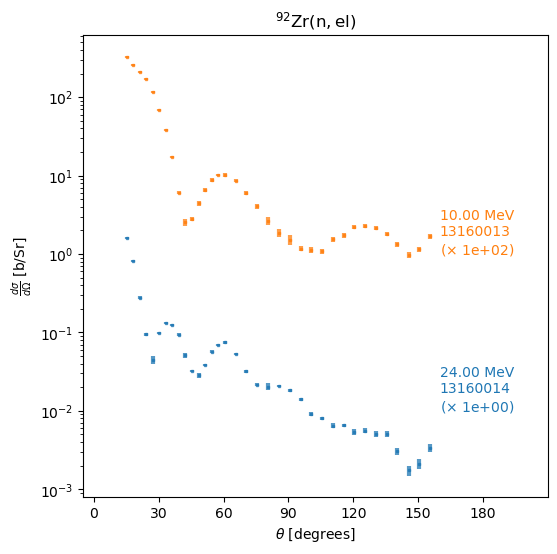

In [155]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=6,
    )
)
axes[0].set_xlim([-5, 210])

(-5.0, 200.0)

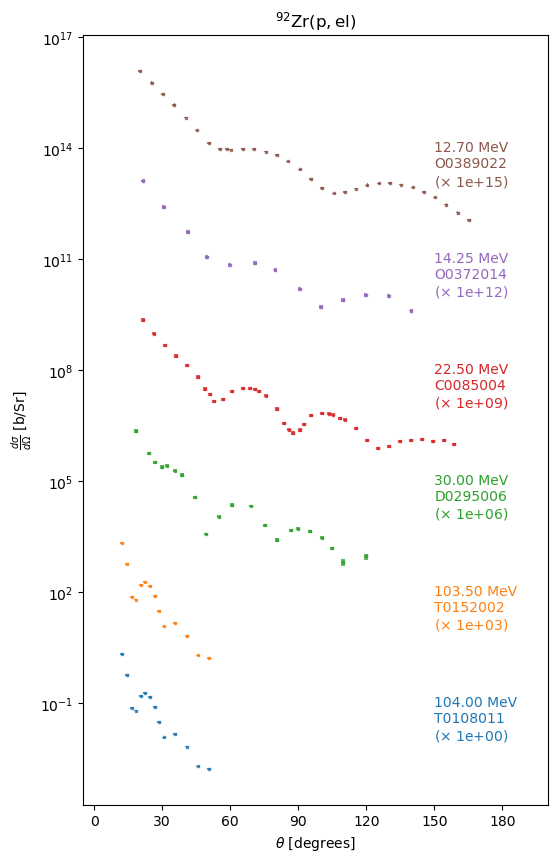

In [156]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 150,
        },
        plot_kwargs={"offsets": 1000},
    )
)
axes[0].set_xlim([-5, 200])

(-20.0, 200.0)

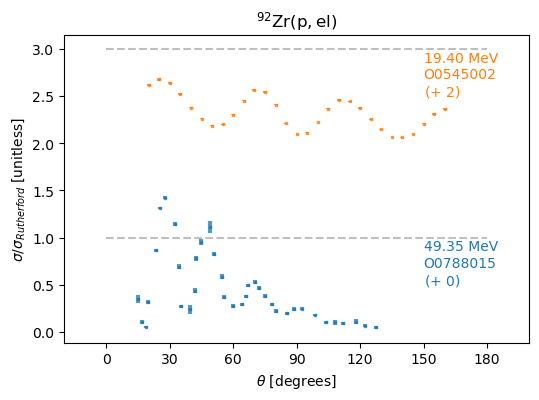

In [157]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{94}$Zr

In [158]:
target = Zr94
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 2}
Number of (p,p) measurements: {'dXS/dA': 1, 'dXS/dRuth': 2}


#### failed parses

In [159]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [160]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

Entry: O0389
O0389033  :  Ambiguous statistical error labels:
ERR-1
ERR-ANALYS (ERR-1) Normalization uncertainty includes:
            * uncertainty of measured target thickness,
            * uncertainty of the detector solid-angle measurement,
            * uncertainty of the beam integration measurements
           (ERR-2) Errors affecting primarily the shapes of the
           angular distributions:
            * For elastic scattering the errors due to counting
           statistics were very small, and the estimate of error
           was obtained from the reproducibility of the data
           points.
            * For inelastic scattering the major contributions to
           error include counting statistics and the estimation of
           the error associated with subtraction of the background
           due to the low-energy tail of the elastically scattered
           protons and due to alpha particles from (p,alpha)
           reactions.
           ERR-ANALYS deleted (see

In [161]:
pp_data[target].data["dXS/dA"].print_failed_parses()

Entry: O0389
O0389033  :  Ambiguous statistical error labels:
ERR-1, ERR-2
ERR-ANALYS (ERR-1) Normalization uncertainty includes:
            * uncertainty of measured target thickness,
            * uncertainty of the detector solid-angle measurement,
            * uncertainty of the beam integration measurements
           (ERR-2) Errors affecting primarily the shapes of the
           angular distributions:
            * For elastic scattering the errors due to counting
           statistics were very small, and the estimate of error
           was obtained from the reproducibility of the data
           points.
            * For inelastic scattering the major contributions to
           error include counting statistics and the estimation of
           the error associated with subtraction of the background
           due to the low-energy tail of the elastically scattered
           protons and due to alpha particles from (p,alpha)
           reactions.
           ERR-ANALYS delet

In [162]:
pp_data[target].data["dXS/dA"].reattempt_parse(
    "O0389",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0389033 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-2']


#### plotting

(-5.0, 210.0)

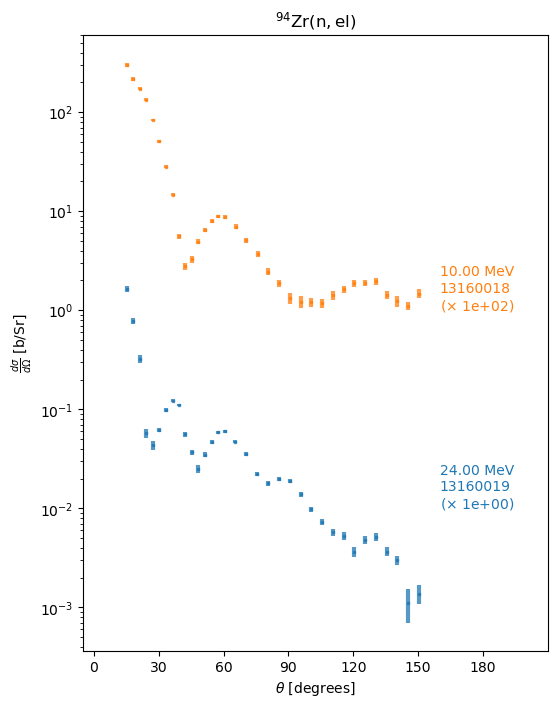

In [163]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=8,
    )
)
axes[0].set_xlim([-5, 210])

(-5.0, 200.0)

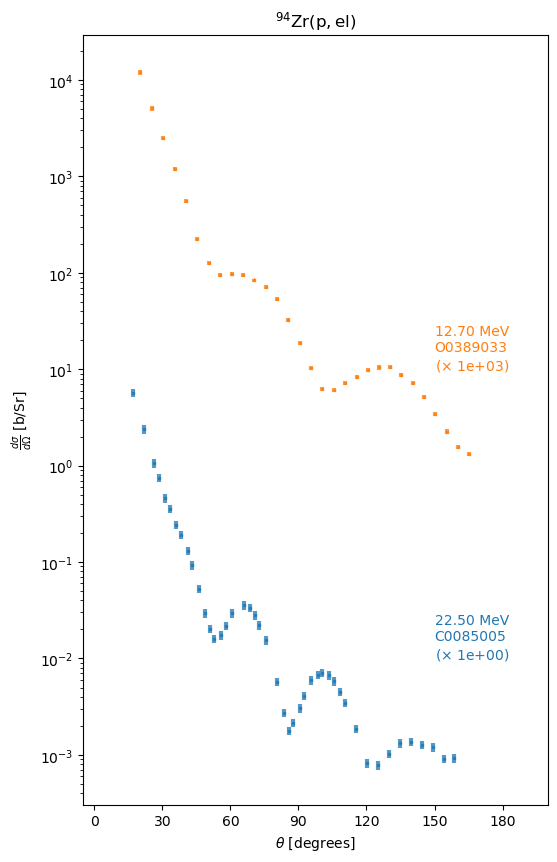

In [164]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 150,
        },
        plot_kwargs={"offsets": 1000},
    )
)
axes[0].set_xlim([-5, 200])

(-20.0, 200.0)

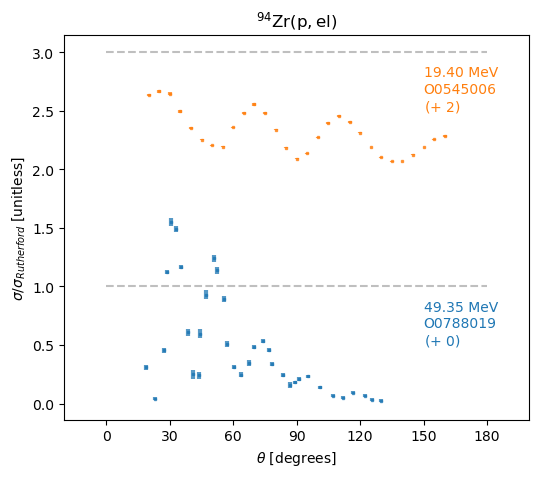

In [165]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=5,
    )
)
axes[0].set_xlim([-20, 200])

## $^{96}$Zr

In [166]:
target = Zr96
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 1, 'dXS/dRuth': 1}


#### failed parses

In [167]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [168]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [169]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 200.0)

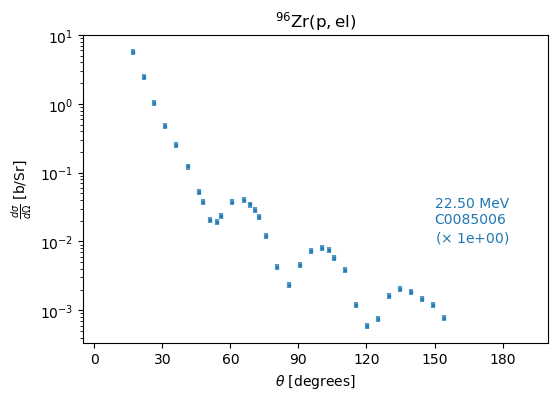

In [170]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 150,
        },
        plot_kwargs={"offsets": 1000},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 200])

(-20.0, 200.0)

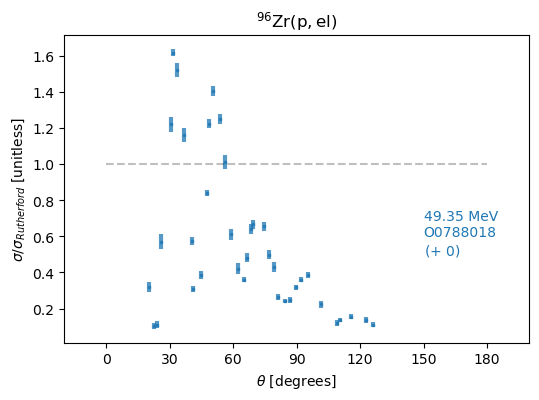

In [171]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{64}$Ni

In [172]:
target = Ni64
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")
flag_entries(target)

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 5, 'dXS/dRuth': 4}
Look at entry E0249 for (p,p) absolute
Look at entry O0032 for (p,p) absolute
Look at entry C1019 for (p,p) ratio
subentry O0432003 is missing statisitcal errors!
Look at entry O0432 for (p,p) ratio


In [173]:
del pp_data[target].data["dXS/dA"].entries["E0249"]
del pp_data[target].data["dXS/dA"].entries["O0032"]
del pp_data[target].data["dXS/dRuth"].entries["C1019"]
del pp_data[target].data["dXS/dRuth"].entries["O0432"]

#### failed parses

In [174]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [175]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [176]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 200.0)

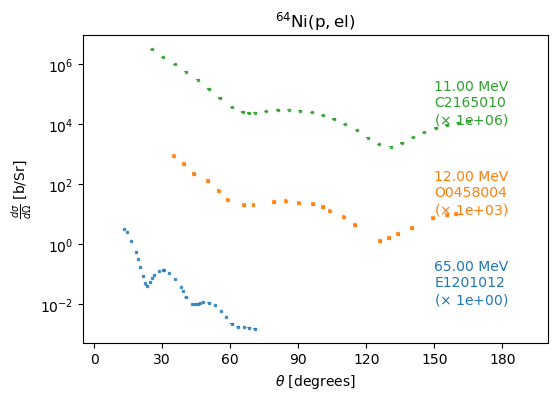

In [177]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 150,
        },
        plot_kwargs={"offsets": 1000},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 200])

(-20.0, 200.0)

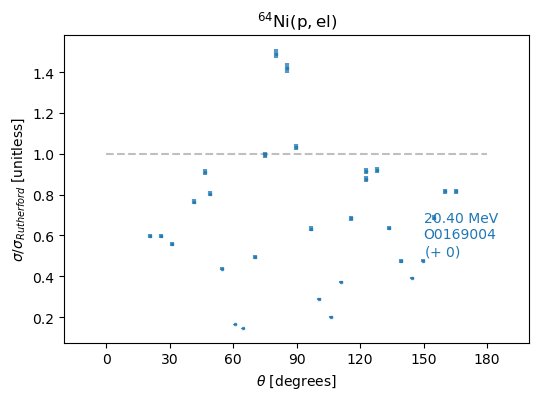

In [178]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{86}$Sr

In [179]:
target = Sr86
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 0, 'dXS/dRuth': 1}


#### failed parses

In [180]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [181]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [182]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-20.0, 200.0)

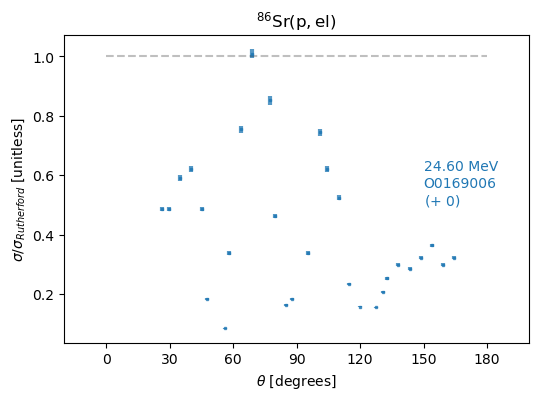

In [183]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{88}$Sr

In [184]:
target = Sr88
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 1}
Number of (p,p) measurements: {'dXS/dA': 0, 'dXS/dRuth': 1}


#### failed parses

In [185]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [186]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [187]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 210.0)

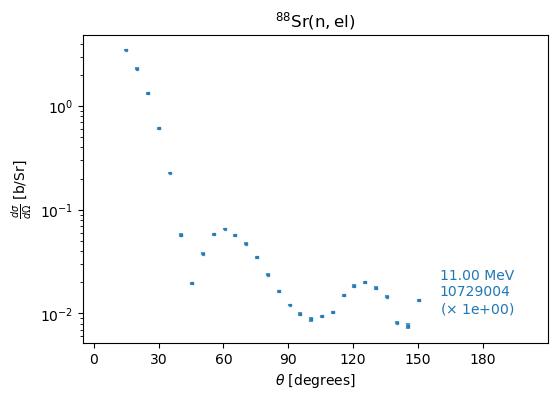

In [188]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=4,
    )
)
axes[0].set_xlim([-5, 210])

(-20.0, 200.0)

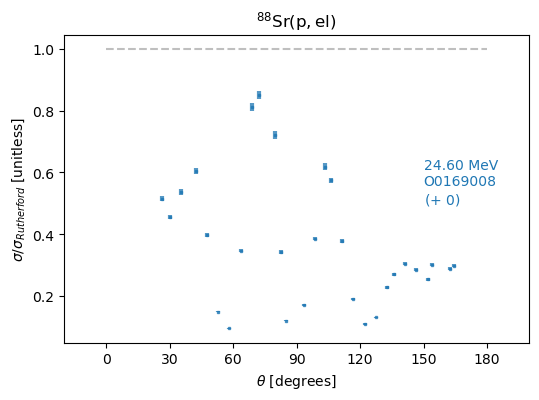

In [189]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{92}$Mo

In [190]:
target = Mo92
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 1}
Number of (p,p) measurements: {'dXS/dA': 9, 'dXS/dRuth': 2}


#### failed parses

In [191]:
nn_data[target].data["dXS/dA"].print_failed_parses()

Entry: 10633
10633012  :  Ambiguous statistical error labels:
DATA-ERR2, MONIT-ERR, DATA-ERR1
ERR-ANALYS (DATA-ERR1) Relative uncertainties
           (DATA-ERR2) Normalization error

Entry: 10867
10867002  :  Ambiguous statistical error labels:
ERR-1, ERR-T
ERR-ANALYS (ERR-T) Overall uncertainty generally less than 10%
            but as high as 20% for some backward angles.
           (ERR-1) Normalization error approx 5%
           (ANG-ERR) Scattering angle error approx 0.3 degrees



In [192]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "10633",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry 10633012 with the following columns:
['EN', 'DATA-ERR2', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


In [193]:
nn_data[target].data["dXS/dA"].reattempt_parse(
    "10867",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry 10867002 with the following columns:
['ANG-ERR', 'ERR-1', 'EN', 'EN-RSL', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [194]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [195]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

(-5.0, 210.0)

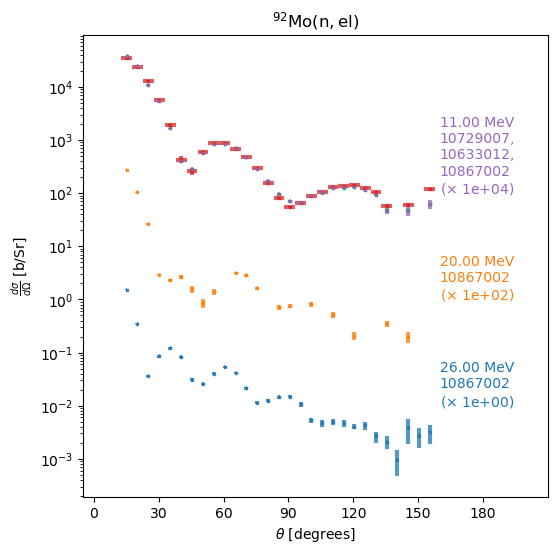

In [196]:
axes = (
    nn_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
        y_size=6,
    )
)
axes[0].set_xlim([-5, 210])

(0.0, 200.0)

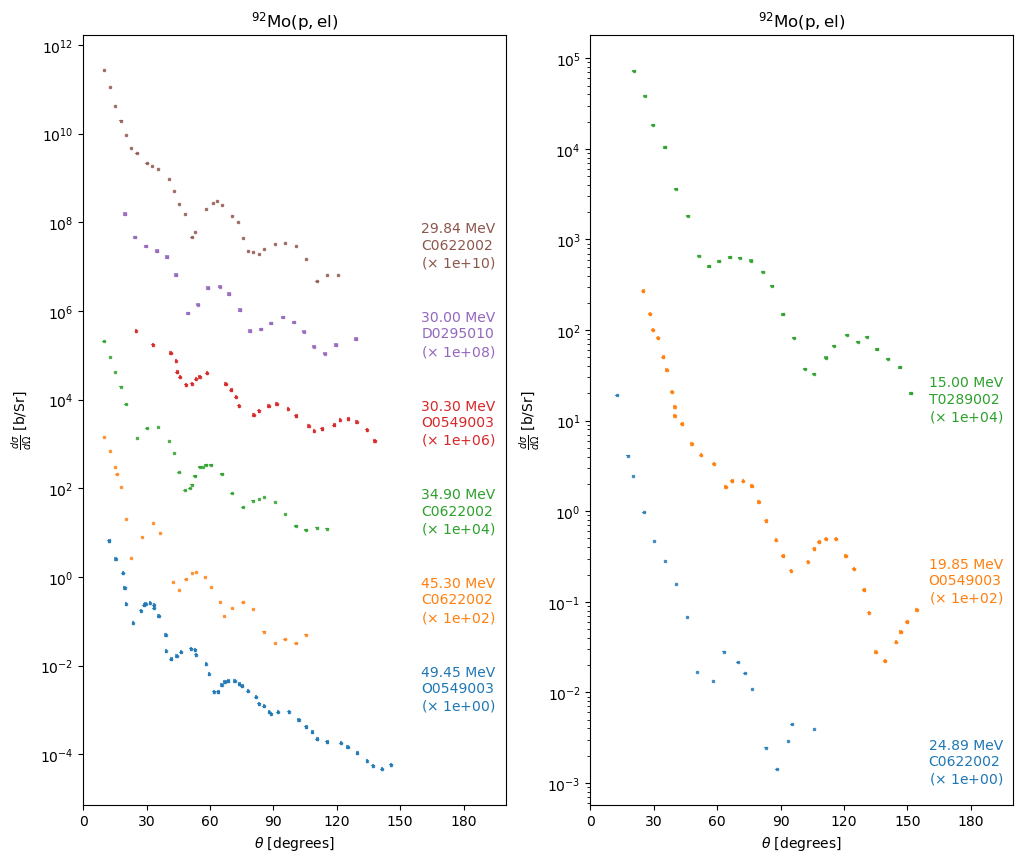

In [197]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.001,
            "label_xloc_deg": 160,
        },
        plot_kwargs={"offsets": 100},
    )
)
axes[0].set_xlim([0, 200])
axes[1].set_xlim([0, 200])

(-20.0, 200.0)

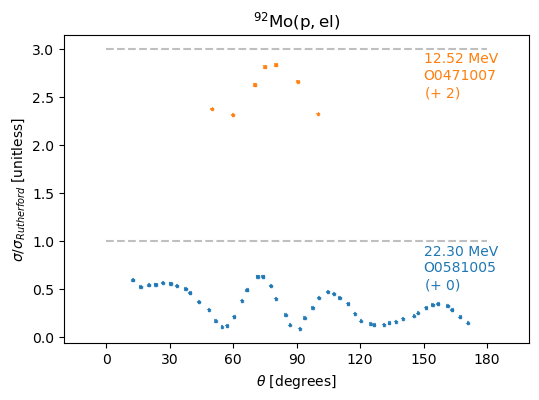

In [198]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=4,
    )
)
axes[0].set_xlim([-20, 200])

## $^{94}$Mo

In [199]:
target = Mo94
print(f"Number of (n,n) measurements: {nn_data[target].num_measurements}")
print(f"Number of (p,p) measurements: {pp_data[target].num_measurements}")

Number of (n,n) measurements: {'dXS/dA': 0}
Number of (p,p) measurements: {'dXS/dA': 2, 'dXS/dRuth': 3}


#### failed parses

In [200]:
nn_data[target].data["dXS/dA"].print_failed_parses()

In [201]:
pp_data[target].data["dXS/dRuth"].print_failed_parses()

In [202]:
pp_data[target].data["dXS/dA"].print_failed_parses()

#### plotting

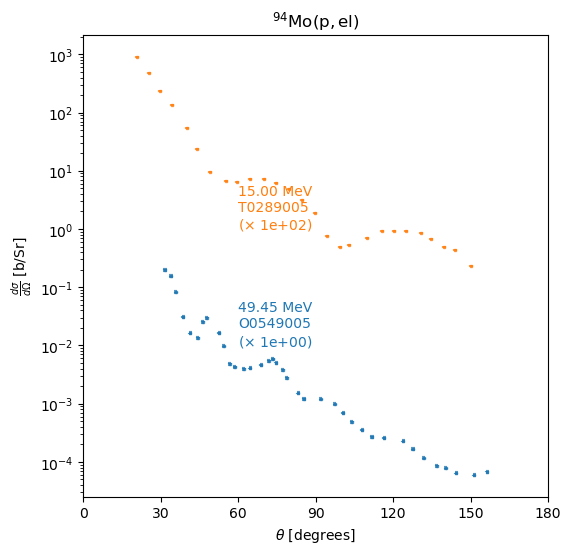

In [203]:
axes = (
    pp_data[target]
    .data["dXS/dA"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 0.01,
            "label_xloc_deg": 60,
        },
        plot_kwargs={"offsets": 100},
        y_size=6,
    )
)

(-20.0, 200.0)

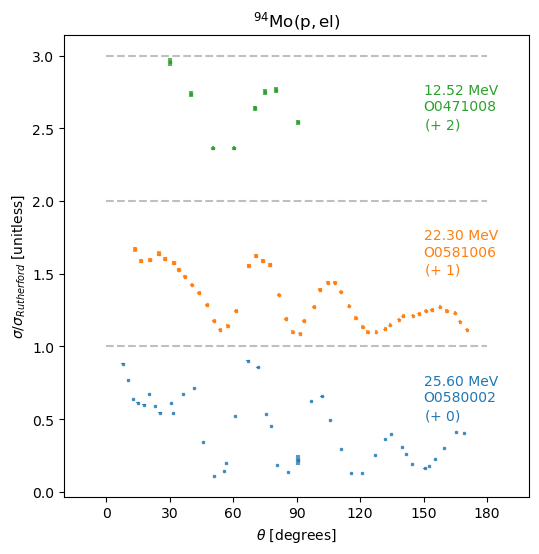

In [204]:
axes = (
    pp_data[target]
    .data["dXS/dRuth"]
    .plot(
        label_kwargs={
            "label_exfor": True,
            "label_offset_factor": 1 / 2,
            "label_xloc_deg": 150,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
            "baseline_offset": 1,
        },
        y_size=6,
    )
)
axes[0].set_xlim([-20, 200])

## Now let's take a look at some attributes of the data

Now that we've removed outliers and fixed failed parses, we should re-cross-reference by entry and re-count the total number of data points:

In [205]:
for quantity, data in pp_data.items():
    data.post_process_entries()
for quantity, data in nn_data.items():
    data.post_process_entries()

(40,20): found duplicates between (p,p) absolute and ratio to Rutherford in O0211
[61.4]
[61.4]
(90,40): found duplicates between (p,p) absolute and ratio to Rutherford in O0211
[61.4]
[61.4]
(116,50): found duplicates between (p,p) absolute and ratio to Rutherford in O0211
[61.4]
[61.4]
(208,82): found duplicates between (p,p) absolute and ratio to Rutherford in O0211
[61.4]
[61.4]


We can see how many data points and measurements we have:

In [206]:
for target, data in pp_data.items():
    print(target, data.num_data_pts, data.num_measurements)

(48, 20) {'dXS/dA': 385, 'dXS/dRuth': 82} {'dXS/dA': 9, 'dXS/dRuth': 3}
(40, 20) {'dXS/dA': 1111, 'dXS/dRuth': 499} {'dXS/dA': 26, 'dXS/dRuth': 15}
(64, 28) {'dXS/dA': 87, 'dXS/dRuth': 29} {'dXS/dA': 3, 'dXS/dRuth': 1}
(86, 38) {'dXS/dA': 0, 'dXS/dRuth': 29} {'dXS/dA': 0, 'dXS/dRuth': 1}
(88, 38) {'dXS/dA': 0, 'dXS/dRuth': 29} {'dXS/dA': 0, 'dXS/dRuth': 1}
(90, 40) {'dXS/dA': 464, 'dXS/dRuth': 193} {'dXS/dA': 12, 'dXS/dRuth': 6}
(92, 40) {'dXS/dA': 131, 'dXS/dRuth': 66} {'dXS/dA': 6, 'dXS/dRuth': 2}
(94, 40) {'dXS/dA': 75, 'dXS/dRuth': 64} {'dXS/dA': 2, 'dXS/dRuth': 2}
(96, 40) {'dXS/dA': 34, 'dXS/dRuth': 37} {'dXS/dA': 1, 'dXS/dRuth': 1}
(92, 42) {'dXS/dA': 278, 'dXS/dRuth': 55} {'dXS/dA': 9, 'dXS/dRuth': 2}
(94, 42) {'dXS/dA': 64, 'dXS/dRuth': 97} {'dXS/dA': 2, 'dXS/dRuth': 3}
(116, 50) {'dXS/dA': 30, 'dXS/dRuth': 105} {'dXS/dA': 1, 'dXS/dRuth': 3}
(118, 50) {'dXS/dA': 0, 'dXS/dRuth': 27} {'dXS/dA': 0, 'dXS/dRuth': 1}
(120, 50) {'dXS/dA': 324, 'dXS/dRuth': 201} {'dXS/dA': 11, 'dXS/dR

In [207]:
for target, data in nn_data.items():
    print(target, data.num_data_pts, data.num_measurements)

(48, 20) {'dXS/dA': 45} {'dXS/dA': 2}
(40, 20) {'dXS/dA': 178} {'dXS/dA': 14}
(64, 28) {'dXS/dA': 0} {'dXS/dA': 0}
(86, 38) {'dXS/dA': 0} {'dXS/dA': 0}
(88, 38) {'dXS/dA': 28} {'dXS/dA': 1}
(90, 40) {'dXS/dA': 96} {'dXS/dA': 3}
(92, 40) {'dXS/dA': 70} {'dXS/dA': 2}
(94, 40) {'dXS/dA': 68} {'dXS/dA': 2}
(96, 40) {'dXS/dA': 0} {'dXS/dA': 0}
(92, 42) {'dXS/dA': 129} {'dXS/dA': 5}
(94, 42) {'dXS/dA': 0} {'dXS/dA': 0}
(116, 50) {'dXS/dA': 89} {'dXS/dA': 3}
(118, 50) {'dXS/dA': 98} {'dXS/dA': 4}
(120, 50) {'dXS/dA': 114} {'dXS/dA': 4}
(122, 50) {'dXS/dA': 28} {'dXS/dA': 1}
(124, 50) {'dXS/dA': 53} {'dXS/dA': 2}
(138, 56) {'dXS/dA': 0} {'dXS/dA': 0}
(144, 62) {'dXS/dA': 0} {'dXS/dA': 0}
(148, 62) {'dXS/dA': 0} {'dXS/dA': 0}
(206, 82) {'dXS/dA': 75} {'dXS/dA': 2}
(208, 82) {'dXS/dA': 452} {'dXS/dA': 20}


In [208]:
num_nn_measuremenmts = int(
    np.sum([np.sum(list(d.num_measurements.values())) for d in nn_data.values()])
)
num_pp_measuremenmts = int(
    np.sum([np.sum(list(d.num_measurements.values())) for d in pp_data.values()])
)
num_nn_pts = int(
    np.sum([np.sum(list(d.num_data_pts.values())) for d in nn_data.values()])
)
num_pp_pts = int(
    np.sum([np.sum(list(d.num_data_pts.values())) for d in pp_data.values()])
)
print(
    f"There are {num_nn_pts} data points in {num_nn_measuremenmts} differential cross sections for (n,n)"
)
print(
    f"There are {num_pp_pts} data points in {num_pp_measuremenmts} differential cross sections for (p,p)"
)

There are 1523 data points in 65 differential cross sections for (n,n)
There are 5896 data points in 160 differential cross sections for (p,p)


By cross-referencing by entry, we can see what the common systematic errors are for single experiments with multiple isotopes, energies, quantities, etc., which can be very useful in evaluation, calibration and UQ.

If we were to construct a likelihood function for calibrating to this data, we would have to consider the correlations in normalization between data sets from the same entry,(making the assumption that each subentry within an entry shares the same systematic error in the normalization):

In [209]:
all_data = list(pp_data.values()) + list(nn_data.values())
all_data_by_entry, sys_uncertainties_by_entry = (
    curate.cross_reference_entry_systematic_err(all_data)
)

In [210]:
print(f"{len(all_data_by_entry.keys())} different Exfor entries!")

73 different Exfor entries!


Let's do some consistency checks:

In [211]:
# check if any entries are on the ignore list
for entry_id, data in all_data_by_entry.items():
    for entry in data:
        if (
            entry_id in entries_to_ignore_nn
            and entry.quantity == "dXS/dA"
            and entry.reaction.projectile == neutron
        ):
            print(entry.reaction.reaction_string, entry.quantity, entry_id, "(n,n)")
        if (
            entry_id in entries_to_ignore_pp_Ruth
            and entry.quantity == "dXS/dRuth"
            and entry.reaction.projectile == proton
        ):
            print(
                entry.reaction.reaction_string, entry.quantity, entry_id, "(p,p) ratio"
            )
        if (
            entry_id in entries_to_ignore_pp_absolute
            and entry.quantity == "dXS/dA"
            and entry.reaction.projectile == proton
        ):
            print(entry.reaction.reaction_string, entry_id, "(p,p)")

144-Sm(p,el) E0904 (p,p)


Let's make sure all the data has statistical uncertainties reported:

In [212]:
# go through entry by entry and check errors:
entries_missing_stat_errs = {}
entries_with_at_keast_one_pt_with_stat_err0 = {}

for entry_id, data in all_data_by_entry.items():
    for i, entry in enumerate(data):
        for j, m in enumerate(entry.measurements):
            if np.allclose(m.statistical_err, 0.0):
                if entry not in entries_missing_stat_errs:
                    entries_missing_stat_errs[entry_id] = [(i, j, m.subentry)]
                else:
                    entries_missing_stat_errs[entry_id].append((i, j, m.subentry))
            if np.any(np.isclose(m.statistical_err, 0.0)):
                if entry not in entries_missing_stat_errs:
                    entries_with_at_keast_one_pt_with_stat_err0[entry_id] = [
                        (i, j, m.subentry)
                    ]
                else:
                    entries_with_at_keast_one_pt_with_stat_err0[entry_id].append(
                        (i, j, m.subentry)
                    )

print("Entries entirely missing statistical errors:")
print("=====================================================================")
# if an entry has subentries missing statistical errors, report it
for entry_id, flagged_subentries in entries_missing_stat_errs.items():
    subentries = []
    reactions = []
    for entry in all_data_by_entry[entry_id]:
        reactions.append(f"{entry.reaction.reaction_string} {entry.quantity}")
        for m in entry.measurements:
            subentries.append(m.subentry)
    print(
        f"Entry: {entry_id}: reaction: "
        + ", ".join(reactions)
        + "\n\tsubentries: "
        + ", ".join(subentries)
        + "\n\t flagged  : "
        + ", ".join(f"{i},{j}, {subent}" for i, j, subent in flagged_subentries)
        #  + f"\n\t{entry.meta}"
    )
print(f"Total flagged entries: {len(entries_missing_stat_errs)}")

print("\nEntries where at least one data point has a statistical error of 0:")
print("=====================================================================")

# if an entry has subentries missing statistical errors, report it
for entry_id, flagged_subentries in entries_with_at_keast_one_pt_with_stat_err0.items():
    subentries = []
    reactions = []
    for entry in all_data_by_entry[entry_id]:
        reactions.append(f"{entry.reaction.reaction_string} {entry.quantity}")
        for m in entry.measurements:
            subentries.append(m.subentry)
    print(
        f"Entry: {entry_id}: reaction: "
        + ", ".join(reactions)
        + "\n\tsubentries: "
        + ", ".join(subentries)
        + "\n\t flagged  : "
        + ", ".join(f"{i},{j}, {subent}" for i, j, subent in flagged_subentries)
        #  + f"\n\t{entry.meta}"
    )
print(f"Total flagged entries: {len(entries_missing_stat_errs)}")

Entries entirely missing statistical errors:
Total flagged entries: 0

Entries where at least one data point has a statistical error of 0:
Entry: T0101: reaction: 40-Ca(p,el) dXS/dA, 90-Zr(p,el) dXS/dA, 208-Pb(p,el) dXS/dA
	subentries: T0101002, T0101002, T0101002, T0101003, T0101003, T0101003, T0101004, T0101004, T0101004, T0101004
	 flagged  : 1,1, T0101003
Entry: O0272: reaction: 208-Pb(p,el) dXS/dA
	subentries: O0272002
	 flagged  : 0,0, O0272002
Entry: 10817: reaction: 116-Sn(n,el) dXS/dA, 118-Sn(n,el) dXS/dA, 120-Sn(n,el) dXS/dA, 122-Sn(n,el) dXS/dA, 124-Sn(n,el) dXS/dA
	subentries: 10817006, 10817006, 10817007, 10817007, 10817008, 10817009, 10817010, 10817010
	 flagged  : 1,1, 10817007
Total flagged entries: 0


At this point, we can just remove these entries, or assign them some estimate for statistical uncertainty

In [213]:
all_data_by_entry["T0101"][1].measurements[1].statistical_err

array([1.994e-01, 1.646e-01, 1.428e-01, 1.140e-01, 8.681e-02, 8.878e-02,
       3.491e-02, 1.814e-02, 1.201e-02, 7.225e-03, 3.623e-03, 1.174e-03,
       1.921e-03, 1.931e-03, 2.700e-03, 2.630e-03, 2.612e-03, 2.328e-03,
       2.501e-03, 2.245e-03, 1.860e-03, 1.331e-03, 8.441e-04, 4.723e-04,
       2.179e-04, 1.787e-04, 2.283e-04, 2.665e-04, 1.833e-04, 2.804e-04,
       2.633e-04, 2.025e-04, 1.991e-04, 1.579e-04, 1.151e-04, 7.228e-05,
       5.787e-05, 4.251e-05, 4.689e-05, 4.042e-05, 4.130e-05, 3.644e-05,
       2.693e-05, 2.237e-05, 1.336e-05, 1.139e-05, 1.030e-05, 1.197e-05,
       1.110e-05, 7.570e-06, 6.693e-06, 4.359e-06, 2.420e-06, 1.523e-06,
       1.039e-06, 1.011e-06, 1.030e-06, 1.056e-06, 1.064e-06, 8.997e-07,
       6.834e-07, 5.127e-07, 3.049e-07, 1.882e-07, 1.539e-07, 1.627e-07,
       1.816e-07, 2.532e-07, 2.582e-07, 8.300e-08, 2.089e-07, 1.643e-07,
       6.500e-08, 1.467e-07, 3.600e-08, 1.210e-08, 1.080e-08, 1.670e-08,
       1.490e-08, 1.290e-08, 9.800e-09, 4.650e-09, 

In [214]:
all_data_by_entry["O0272"][0].measurements[0].statistical_err

array([3.920e+01, 5.068e+00, 4.060e+00, 2.569e+00, 1.638e+00, 1.043e+00,
       6.580e-01, 4.200e-01, 1.701e-01, 2.310e-02, 3.640e-02, 4.410e-02,
       4.410e-02, 1.785e-02, 1.141e-02, 7.210e-03, 1.855e-03, 1.029e-03,
       1.183e-03, 2.450e-03, 3.850e-03, 4.690e-03, 2.968e-03, 1.890e-03,
       7.630e-04, 3.094e-04, 4.060e-04, 4.900e-04, 4.130e-04, 3.143e-04,
       2.002e-04, 1.274e-04, 8.120e-05, 6.860e-05, 3.290e-05, 2.786e-05,
       1.771e-05, 1.351e-05, 8.610e-06, 4.550e-06, 4.830e-06, 3.500e-06,
       2.947e-06, 1.876e-06, 9.100e-07, 7.630e-07, 4.900e-07, 7.700e-07,
       4.900e-07, 4.690e-07, 2.373e-07, 3.780e-07, 2.394e-07, 1.267e-07,
       9.660e-08, 5.110e-08, 3.920e-08, 6.230e-08, 8.540e-08, 6.300e-08,
       3.990e-08, 1.610e-08, 6.510e-09, 6.580e-09, 6.580e-09, 9.030e-09,
       1.309e-08, 1.043e-08, 4.200e-09, 2.688e-09, 1.092e-09, 9.100e-10,
       1.099e-09, 1.106e-09, 1.113e-09])

In [215]:
# this one looks like its just missing a data point
print(all_data_by_entry["10817"][1].measurements[1].statistical_err)
all_data_by_entry["10817"][1].measurements[1].statistical_err[7] = 0.0003

[0.0058  0.0076  0.005   0.0007  0.0007  0.0006  0.0003  0.      0.0001
 0.0006  0.0002  0.0001  0.0005  0.0006  0.0006  0.0002  0.00076 0.00055
 0.00085 0.00072 0.0003  0.0008  0.00076 0.00049 0.00053]


Finally, ensure all entries are in the correct units and assign a default value to the systematic normalization error if none is reported.

In [216]:
default_sys_norm_err = 0.05
for entry_id, data in all_data_by_entry.items():
    for entry in data:
        for m in entry.measurements:
            # assign default systematic normalization error
            if np.isclose(m.systematic_norm_err, 0):
                m.systematic_norm_err = default_sys_norm_err

            # check units for sanity
            if m.y_units == "barns/ster":
                m.y_units = "b/Sr"
                assert m.quantity == "dXS/dA"
            elif m.y_units == "no-dim":
                assert m.quantity == "dXS/dRuth"
            elif m.y_units == "b/Sr":
                assert m.quantity == "dXS/dA"

We can write our data to disk like so:

In [217]:
import pickle
from pathlib import Path

output_dir = Path("./corpus/")
output_dir.mkdir(parents=True, exist_ok=True)

Let's also just write the measurements to a file:

In [218]:
nn_elastic_measurements = curate.build_measurement_list("dXS/dA", nn_data)
pp_elastic_measurements = curate.build_measurement_list(
    "dXS/dRuth", pp_data, allowed_measurement_quantities=["dXS/dA", "dXS/dRuth"]
)

In [219]:
with open(output_dir / "pp_elastic_data.pkl", "wb") as f:
    pickle.dump(pp_elastic_measurements, f)
with open(output_dir / "nn_elastic_data.pkl", "wb") as f:
    pickle.dump(nn_elastic_measurements, f)